Inspi:  test

- https://www.kaggle.com/code/hasibalmuzdadid/brain-stroke-analysis-accuracy-96-03/notebook#Basic-Exploration
- https://www.kaggle.com/code/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy
- Emilies
- Exercise 3 fra BDM – tager udgangspunkt i brain stroke datasæt

# 1. Busines Understanding

## The business problem

The dataset used in this project is related to healthcare, as it contains data regarding stroke, which is is a critical life-threatening medical condition.

Stroke is according to the World Health Organization (WHO) the 2nd leading cause of death on a global plan. This accounts for approximately 11% of total deaths being caused by strokes. 

From both a societal and business perspective, it is relevant to address this problem. From a societal perspective, the health of patients can be improved. From a business perspective, it can redue costs related to hospitalization and treatment of hospitals. 

The dataset applied to this project is used to predict whether a patient is likely to encounter a stroke or not. The prediction is based on a variety of input parameters, which provides relevant information characterizing the individual patient. 


## Understanding of the context
Initially it is important to gather insights regarding the context of the problem we are scoping. 

- Information on brain strokes
https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset?resource=download

# 2. Data Understanding

Initially, we conduct an exploratory data analysis to get insights into the dataset.

## Importing libraries and packages

In [2062]:
# Importing packages and libraries

# Data handling
import pandas as pd 
import numpy as np 
import imblearn 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Statistics
from numpy import mean
from numpy import std
from numpy import array  

# Classifier Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #Used
from sklearn import tree # For plotting decision tree

from sklearn.ensemble import RandomForestClassifier # Extra model

# Train-test split
from sklearn.model_selection import train_test_split

# SMOTE
from imblearn.over_sampling import SMOTE # For resampling imbalanced datasets

# Hyperparameter Optimization
from sklearn.pipeline import make_pipeline # For hyperparameter optimization RandomSearchCV
from sklearn.preprocessing import StandardScaler # For hyperparameter optimization RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection
from sklearn.feature_selection import RFECV, SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold

# Evaluation
from sklearn.metrics import accuracy_score, classification_report # For evaluating model performance
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay # For plotting confusion matrices
from sklearn.model_selection import cross_val_score

## Importing dataset

In [2051]:
# Importing the csv file containing the dataset 
df = pd.read_csv('strokes.csv', sep=',')

## Attribute Information

To get insight to the dataset, we look at the attributes and their values.

The dataset has 12 attributes, where one of them is the target value (`stroke`)

- **id:** Unique identifier

- **gender:** Indicating the gender of the patient - "Male", "Female" or "Other"

- **age:** Age of the patient

- **hypertension:** 0 (the patient doesn't have hypertension), 1 (the patient has hypertension)

- **heart_disease:** 0  (the patient doesn't have any heart diseases), 1 (the patient has a heart disease)

- **ever_married:** Indicating if the patient has ever been married - "No" (the patient has not been married) "Yes"

- **work_type:** Indicating what type of work the patient has - "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

- **Residence_type:** Indicating the type of setting where the patient lives - "Rural" or "Urban"
    - *Rural:* Indicates that the location is generally out in the country, outside of cities, typically not densely populated.
    - *Urban:* Indicates that the location is in the city - a location that is densely populated.
    
- **avg_glucose_level:** average glucose level in blood

- **bmi:** Body Mass Index

- **smoking_status:** Indicates the smoking status of the patient - "formerly smoked", "never smoked", "smokes" or "Unknown"*
    - *Note:* "Unknown" in `smoking_status` means that the information is unavailable for this patient.

- **stroke:** The target value, indicating whether the patient has had a stroke or not - 1 (the patient had a stroke) or 0 (the patient hsa not had a stroke)

*Source* https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


## Insights from exploring the dataset

In [2052]:
# Shape of the dataset - Number of rows and columns
df.shape

(5110, 12)

**Insights:**
- The dataset has 5110 rows and 12 columns (attributes)

In [2053]:
# Display top 5 instances of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- The dataset contains 5110 instances with 11 features and 1 output variable 
- We will drop the **id**-column later on, as it doesn't affect the prediction of the target value.

In [2054]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Insights:**
- The dataset contains both *numerical* and *categorical* variables
    - 5 numerical features: age, hypertension, heart_disease, avg_glucose_level, bmi, stroke
    - 4 categorical features: gender, ever_married, work_type, Residence_type, smoking_status
- The *categorical* features will need to be encoded to numerical values, which will be done later on.
- The *bmi*-column contains null-values, which we will look further into

In [2055]:
# Analyze summary statistics - numeric columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [2056]:
# Analyze summary statistics - categorical (object) columns
df.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### Duplicates

In [2057]:
# Checking for duplicate values
df.duplicated().sum()

0

**Insights:**
- There is 0 duplciates among the total 5110 entries in the dataset

### Null-values

In [2058]:
# Checking for null values - amount and percentage of missing values for each attribute
def missing_values (df):
    number_missing = df.isnull().sum()
    percentage_missing = round(df.isnull().mean()*100,2)
    values_missing = pd.concat([number_missing, percentage_missing], axis=1, keys=['Missing Values (amount)', 'Missing Values (%)'])
    return values_missing

missing_values(df)

,Missing Values (amount),Missing Values (%)
id,0,0.00
gender,0,0.00
age,0,0.00
hypertension,0,0.00
heart_disease,0,0.00
ever_married,0,0.00
work_type,0,0.00
Residence_type,0,0.00
avg_glucose_level,0,0.00
bmi,201,3.93


**Insights:**
- There are 201 null-values in the *bmi*-column, meaning that there are missing values. This corresponds to approx. 4% missing values within the *bmi*-column.
- Instead of dropping null-values, we will replace missing values by performing impuration later on to address missing values

### Target Variable

In [2059]:
# We take a look at the values of the target variable (y)
y = df['stroke']

# sum(y)/len(y)*100

# Percentage and number of patients that had a stroke:
print(f'Percentage of patients that had a stroke: {round(y.value_counts(normalize=True)[1]*100,2)}% ({y.value_counts()[1]} patients) ')
      
# Percentage of patient that had a stroke:
print(f'Percentage of patients that did not have a stroke: {round(y.value_counts(normalize=True)[0]*100,2)}% ({y.value_counts()[0]} patients)')

Percentage of patients that had a stroke: 4.87% (249 patients) 
Percentage of patients that did not have a stroke: 95.13% (4861 patients)


**Insights:**
- Approx. 5% instances of the target variable is 1 (*stroke*) --> 249 of the patients did have a stroke
- Approx. 95% instances of the target variable is 0 (*no stroke*) --> 4861 of the patients did not have a stroke 


    --> This indicates that the dataset contains imbalanced data, as the target class labels are unequally distributed

Text(0.5, 1.0, 'Stroke')

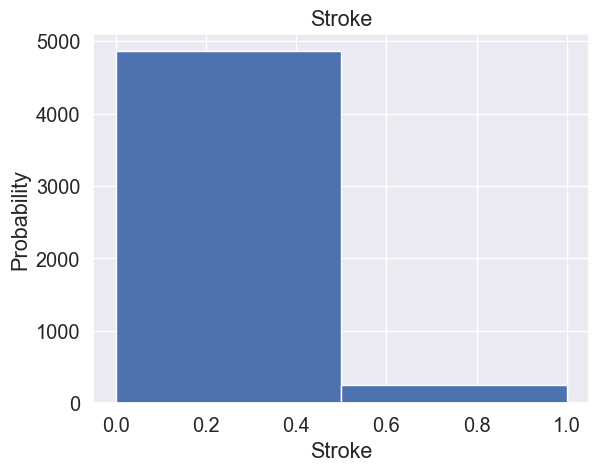

In [2060]:
# PLotting histogram of the target variable
plt.hist(df['stroke'], bins=2)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Stroke');
plt.title('Stroke')

### Imbalanced Data
**Insights:**
- Imbalanced data is when the target class labels in a dataset are unequally distributed
- We see that instances across classes are imbalanced, which indicates that the dataset is imbalanced
- There are 19 times (4861/249) more patients that did not have stroke than patients that did have had a stroke. Thereby the non-stroke class dominates the stroke class.
    - Intermediate calculation: 4861+249=5110

- The stroke ratio is 0.05 (249/5110), which indicates an extreme degree of imbalance. 

    --> We will address imbalanced data later on

Reference: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

### Histograms - Plot distribution of attributes of interest
We also plot the distribution of a selection of attributes of interest to gain more insights into our data.

We will only use the gender, age, hypertension, heart_disease, avg_glucose_level, bmi and smoking_status attributes, therefore we will plot histograms for these

Text(0.5, 1.0, 'Histogram of Age')

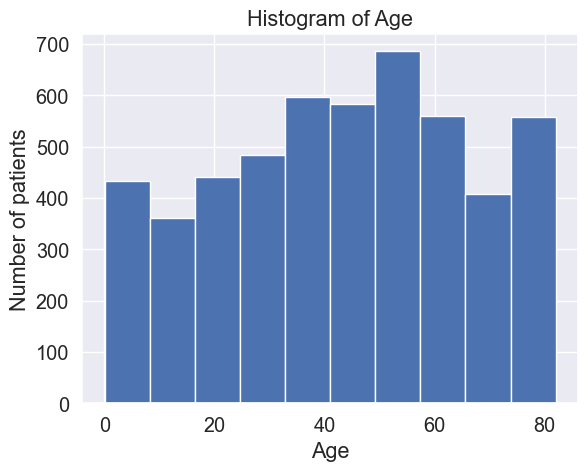

In [2061]:
# Plotting histogram for the 'age'-attribute
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of Gender')

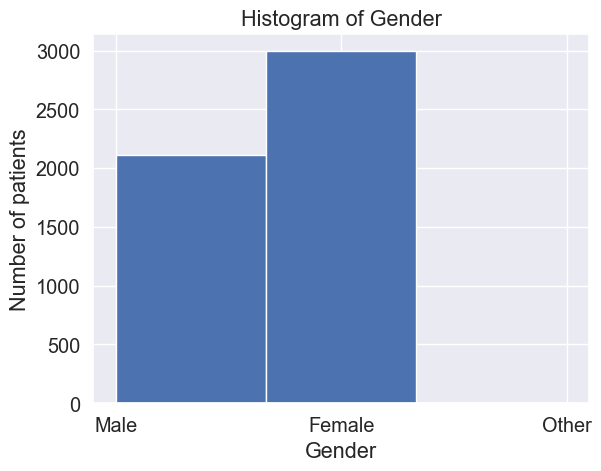

In [1889]:
# Plotting histogram for the 'gender'-attribute
plt.hist(df['gender'], bins=3)
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Histogram of Gender')

Text(0.5, 1.0, 'Histogram of Hypertension')

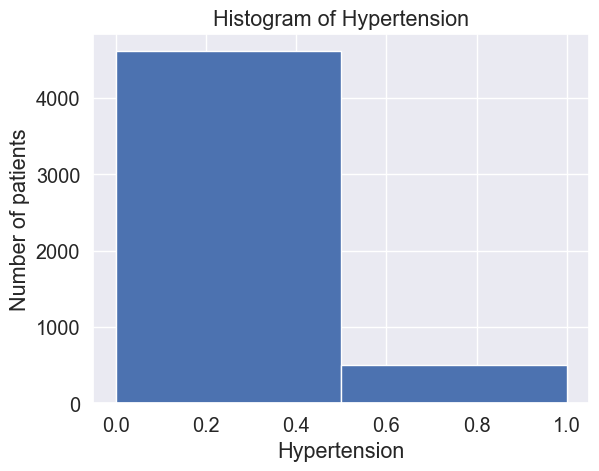

In [1890]:
# Plotting histogram for the 'hypertension'-attribute
plt.hist(df['hypertension'], bins=2)
plt.xlabel('Hypertension')
plt.ylabel('Number of patients')
plt.title('Histogram of Hypertension')

Text(0.5, 1.0, 'Histogram of Disease')

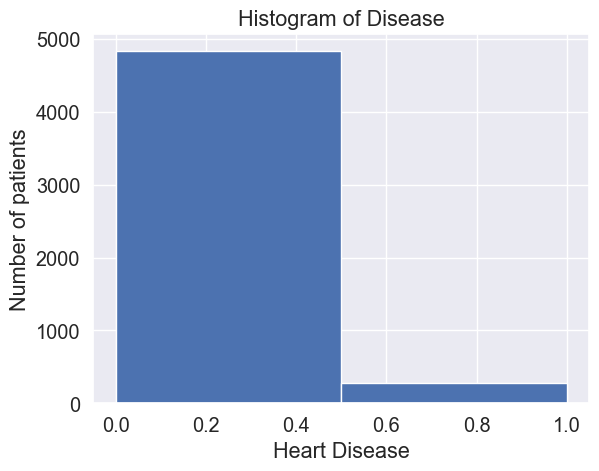

In [1891]:
# Plotting histogram for the 'heart_disease'-attribute
plt.hist(df['heart_disease'], bins=2)
plt.xlabel('Heart Disease')
plt.ylabel('Number of patients')
plt.title('Histogram of Disease')

Text(0.5, 1.0, 'Histogram of Average Glucose Level')

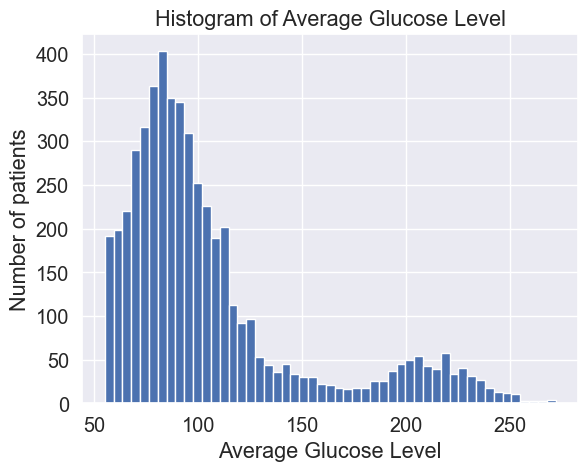

In [1892]:
# Plotting histogram for the 'avg_glucose_level'-attribute
plt.hist(df['avg_glucose_level'], bins='auto')
plt.xlabel('Average Glucose Level')
plt.ylabel('Number of patients')
plt.title('Histogram of Average Glucose Level')

Text(0.5, 1.0, 'Histogram of BMI')

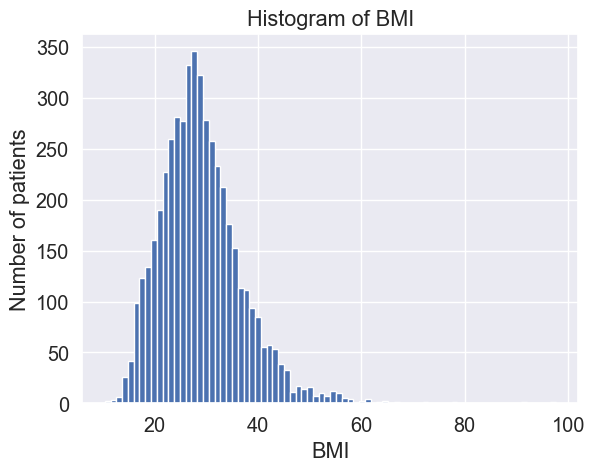

In [1893]:
# Plotting histogram for the 'bmi'-attribute
plt.hist(df['bmi'], bins='auto')
plt.xlabel('BMI')
plt.ylabel('Number of patients')
plt.title('Histogram of BMI')

Text(0.5, 1.0, 'Smoking Status')

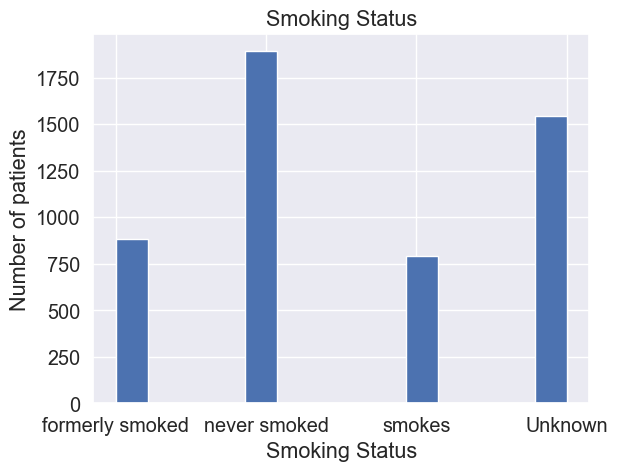

In [1894]:
# Plotting histogram for the 'smoking_status'-attribute
plt.hist(df['smoking_status'], bins='auto')
plt.xlabel('Smoking Status')
plt.ylabel('Number of patients')
plt.title('Smoking Status')

# 3. Data Preparation
Before builing our models, we do data preprocessing on our dataset. This implies cleaning our dataset where we check for duplicates and missing data, impute missing values, remove attributes, etc.  We will do the following:
- Renaming attributes for standardization
- Select informative attributes
- Imputation to replace missing values
- Declare feature matrix (X) and target variable (y)
- Encode categorical attributes

## From business to Machine Learning Problem

- In this project we encounter a binary classification problem.
- The prediction is made on the `stroke`-attribute, which is the target variable.
- The purpose is to build a machine learning model, that provides the best prediction on the `stroke`-variable.

## Renaming attributes and values

In [1895]:
# Renanming column names to get a standardized dataset
df.rename(columns={"id": "Id", "gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart_disease","ever_married":"Ever_married","work_type":"Work_type","avg_glucose_level": "Avg_glucose_level","bmi":"BMI","smoking_status":"Smoking_status","stroke":"Stroke"}, inplace = True)

# Renaming value names of attributes
df["Work_type"].replace({"Self-employed":"Self_employed","children":"Children", "Govt_job":"Government_job", "Private":"Private_job"}, inplace = True)
df["Smoking_status"].replace({"never smoked":"Never_smoked","formerly smoked":"Formerly_smoked", "smokes":"Smokes"}, inplace = True) # Dropping this later
# Encoding categorical to binary value
df["Ever_married"].replace({"No":0, "Yes":1}, inplace = True)

# Changing the order of the attributes
df = df[["Id","Age","Gender","Ever_married","BMI","Work_type","Residence_type","Smoking_status","Hypertension","Heart_disease","Avg_glucose_level","Stroke"]]

# Printing a glimpse of dataset after processing
print("After preprocessing, the data set looks as follows :")
df.head()

After preprocessing, the data set looks as follows :


,Id,Age,Gender,Ever_married,BMI,Work_type,Residence_type,Smoking_status,Hypertension,Heart_disease,Avg_glucose_level,Stroke
0,9046,67.0,Male,1,36.6,Private_job,Urban,Formerly_smoked,0,1,228.69,1
1,51676,61.0,Female,1,NaN,Self_employed,Rural,Never_smoked,0,0,202.21,1
2,31112,80.0,Male,1,32.5,Private_job,Rural,Never_smoked,0,1,105.92,1
3,60182,49.0,Female,1,34.4,Private_job,Urban,Smokes,0,0,171.23,1
4,1665,79.0,Female,1,24.0,Self_employed,Rural,Never_smoked,1,0,174.12,1


## Adressing null values

### Imputation
Because it is already a rather small dataset, it is preferred not to remove instances with missing values. Instead, we perform imputation where we replace the missing values instead of removing them.
We do this by replacing the missing values with the mean of the rest of the values in the given column

In [1896]:
# Replacing missing values with the mean of the rest of the values in the BMI column
df['BMI'] = df['BMI'].replace(np.nan, df['BMI'].mean())

# Checking that the imputation worked 
for col in df:
    print(df[col].isnull().sum(), "missing values in", col)
    
# Source: exercise in lecture 6 

0 missing values in Id
0 missing values in Age
0 missing values in Gender
0 missing values in Ever_married
0 missing values in BMI
0 missing values in Work_type
0 missing values in Residence_type
0 missing values in Smoking_status
0 missing values in Hypertension
0 missing values in Heart_disease
0 missing values in Avg_glucose_level
0 missing values in Stroke


In [1897]:
# Old
# Test - Hvis vi også fjerner "Ever_married, Work_type, Residence_type" ud over Id, 
# 
# # Replacing missing values with the mean of the rest of the values in the BMI column
# df_selected['BMI'] = df_selected['BMI'].replace(np.nan, df_selected['BMI'].mean())

# Checking that the imputation worked 
#for col in df_selected:
#    print(df_selected[col].isnull().sum(), "missing values in", col)
    
# Source: exercise in lecture 6 

In [1898]:
# Dropping null values from dataframe
# df.dropna(axis = 0, inplace = True)
# print (f' The shape of the dataset after dropping null values is {df.shape}')

## Correlation Matrix
TODO:
- Evt. Correlation map (https://www.kaggle.com/code/helenaglaring/brain-stroke-analysis-accuracy-96-0-32bc8c/edit)


<AxesSubplot: >

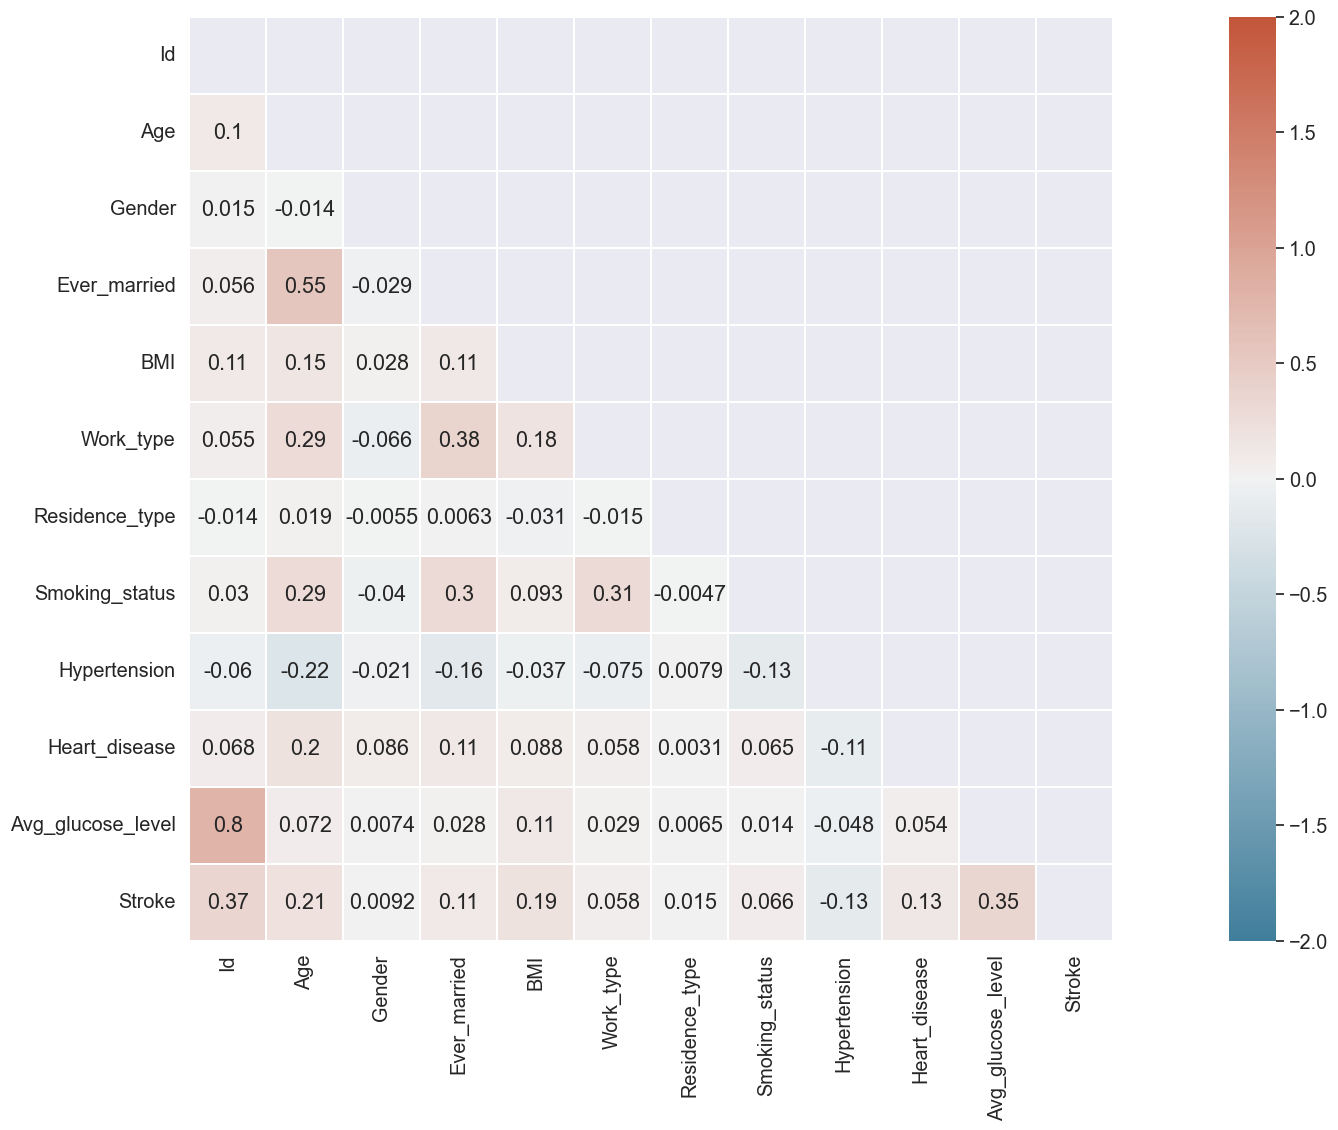

In [1899]:
# Defining correlation matrix
corr_matrix = df.apply(lambda x: pd.factorize(x)[0]).corr()

# Generating a mask for upper triangle in the matrix. 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Creating the figure - defining plot size
f, ax = plt.subplots(figsize=(30,12))

# Making a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Creating a heat map illustrating the correlation between attributes and target variable 
# - Defining vmin and vmax to set the range of values to be displayed on the map from -1 to 1,
# -"Center" - takes a float to center the colormap; if no cmap specified, will change the colors in the default colormap; if set to True — it changes all the colors of the colormap to blues
# -Setting 'annot' to True to make values visible on the cells
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-2, vmax=2, center=0, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            square=True, linewidths=.2, annot=True)

# Source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html


Text(0.5, 1.0, 'Features Correlating with Stroke')

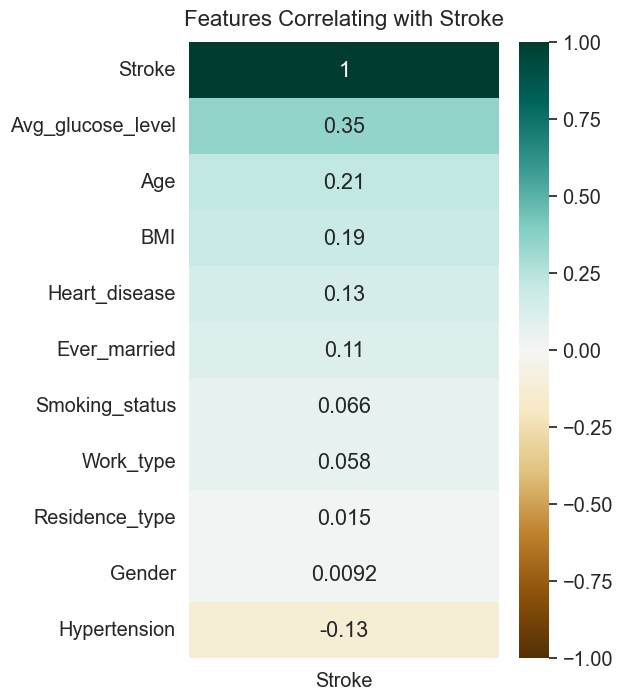

In [2048]:
# Defining correlation matrix showing correlation of Independent Variables with the Dependent Variable
plt.figure(figsize=(5,8))

# Displaying the correlation of all attributes with ‘Stroke’, the dependent variable, sorted in descending manner.
heatmap = sns.heatmap(df.apply(lambda x: pd.factorize(x)[0]).corr()[['Stroke']].sort_values(by='Stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Stroke', fontdict={'fontsize':16}, pad=12)

#Source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

## Drop irelevant attributes

In [1901]:
# Try to use lower number of attributes
# Only use  the gender, age, hypertension, heart_disease, avg_glucose_level, bmi and smoking_status attributes.
# df = df.drop(['Id','Ever_married','Work_type','Residence_type'], axis='columns')

In [1902]:
# Dropping "ID" column from dataframe
df = df.drop('Id', axis='columns') # Only dropping Id

# We will only use the gender, age, hypertension, heart_disease, avg_glucose_level, bmi and smoking_status attributes.
# Dropping attributes Id, Ever_married, Work_type, Residence_type
# df_selected = df.drop(['Id','Ever_married','Work_type','Residence_type'], axis='columns') - Remove # if we want to drop Id, Ever_married, Work_type, Residence_type

# Shape of dataset after dropping 'id'-attribute
print (f' The dataset contains {df.shape[0]} instances with {df.shape[1]-1} features and 1 output variable')

# Display top 5 instances of dataset after dropping attributes
df.head()

 The dataset contains 5110 instances with 10 features and 1 output variable


,Age,Gender,Ever_married,BMI,Work_type,Residence_type,Smoking_status,Hypertension,Heart_disease,Avg_glucose_level,Stroke
0,67.0,Male,1,36.600000,Private_job,Urban,Formerly_smoked,0,1,228.69,1
1,61.0,Female,1,28.893237,Self_employed,Rural,Never_smoked,0,0,202.21,1
2,80.0,Male,1,32.500000,Private_job,Rural,Never_smoked,0,1,105.92,1
3,49.0,Female,1,34.400000,Private_job,Urban,Smokes,0,0,171.23,1
4,79.0,Female,1,24.000000,Self_employed,Rural,Never_smoked,1,0,174.12,1


## Declaring matrix X and target vector y

In [1903]:
# Selecting the relevant attributes and creating the features vector X and the target vector y.

# Target vector
y = df['Stroke'] # 1D array where the ith entry relates to the target of the ith sample (row) of X

# Features matrix
X = df.iloc[:,:-1] # 2D array, where instances are represented as rows and features/attributes are represented as columns. - kommenteret ud å pga test
# All rows, columns from 0 to second last (last column is target)

# X = df_selected.iloc[:,:-1] # 2D array, where instances are represented as rows and features/attributes are represented as columns.- Used if removing "Ever_married, Work_type, Residence_type" ud over Id, 

#y = df.iloc[:, -1].values # All rows, last column
#X = df.iloc[:, 1:-1].values # All rows, column 1 to second last (last column is target variable)
#https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/

## Encoding of categorical attributes to numerical
As identified under data understanding, there are attribtues in the dataset that need som preprossing.

We identified 4 categorical attributes that need to be encoded into numerical values. The multiple nominal variable are converted into multiple binary-valued features (0s and 1a) by applying the pandas get_dummies()-function. 

The categorical features are: gender, ever_married, work_type, Residence_type, smoking_status

In [1904]:
# Encoding categorical attributes in the features matrix X into numerical
X = pd.get_dummies(X)

# Attributes (columns) after encoding

print(f'''After encoding: 
Shape of X: {X.shape}
Features: {X.columns}''')

After encoding: 
Shape of X: (5110, 20)
Features: Index(['Age', 'Ever_married', 'BMI', 'Hypertension', 'Heart_disease',
       'Avg_glucose_level', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Work_type_Children', 'Work_type_Government_job',
       'Work_type_Never_worked', 'Work_type_Private_job',
       'Work_type_Self_employed', 'Residence_type_Rural',
       'Residence_type_Urban', 'Smoking_status_Formerly_smoked',
       'Smoking_status_Never_smoked', 'Smoking_status_Smokes',
       'Smoking_status_Unknown'],
      dtype='object')


In [1905]:
# Feature matrix X after encoding
X.head()

,Age,Ever_married,BMI,Hypertension,Heart_disease,Avg_glucose_level,Gender_Female,Gender_Male,Gender_Other,Work_type_Children,Work_type_Government_job,Work_type_Never_worked,Work_type_Private_job,Work_type_Self_employed,Residence_type_Rural,Residence_type_Urban,Smoking_status_Formerly_smoked,Smoking_status_Never_smoked,Smoking_status_Smokes,Smoking_status_Unknown
0,67.0,1,36.600000,0,1,228.69,0,1,0,0,0,0,1,0,0,1,1,0,0,0
1,61.0,1,28.893237,0,0,202.21,1,0,0,0,0,0,0,1,1,0,0,1,0,0
2,80.0,1,32.500000,0,1,105.92,0,1,0,0,0,0,1,0,1,0,0,1,0,0
3,49.0,1,34.400000,0,0,171.23,1,0,0,0,0,0,1,0,0,1,0,0,1,0
4,79.0,1,24.000000,1,0,174.12,1,0,0,0,0,0,0,1,1,0,0,1,0,0


In [1906]:
#  info after pre-processing
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             5110 non-null   float64
 1   Ever_married                    5110 non-null   int64  
 2   BMI                             5110 non-null   float64
 3   Hypertension                    5110 non-null   int64  
 4   Heart_disease                   5110 non-null   int64  
 5   Avg_glucose_level               5110 non-null   float64
 6   Gender_Female                   5110 non-null   uint8  
 7   Gender_Male                     5110 non-null   uint8  
 8   Gender_Other                    5110 non-null   uint8  
 9   Work_type_Children              5110 non-null   uint8  
 10  Work_type_Government_job        5110 non-null   uint8  
 11  Work_type_Never_worked          5110 non-null   uint8  
 12  Work_type_Private_job           51

In [1907]:
# Encoding creating a new dataframe

# Creating a new dataframe with encoded attributes
df_encoded = pd.get_dummies(df) 

# Shifting the column with the target variable "Stroke" to the last column of dataframe to perform iloc
shift = df_encoded['Stroke'] 
df_encoded = df_encoded.drop('Stroke', axis = 1)
df_encoded = df_encoded.join(shift)

# Dataframe after pre-processing
df_encoded.head()

,Age,Ever_married,BMI,Hypertension,Heart_disease,Avg_glucose_level,Gender_Female,Gender_Male,Gender_Other,Work_type_Children,...,Work_type_Never_worked,Work_type_Private_job,Work_type_Self_employed,Residence_type_Rural,Residence_type_Urban,Smoking_status_Formerly_smoked,Smoking_status_Never_smoked,Smoking_status_Smokes,Smoking_status_Unknown,Stroke
0,67.0,1,36.600000,0,1,228.69,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
1,61.0,1,28.893237,0,0,202.21,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
2,80.0,1,32.500000,0,1,105.92,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
3,49.0,1,34.400000,0,0,171.23,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
4,79.0,1,24.000000,1,0,174.12,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1


In [1908]:
# Dataframe info after pre-processing
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             5110 non-null   float64
 1   Ever_married                    5110 non-null   int64  
 2   BMI                             5110 non-null   float64
 3   Hypertension                    5110 non-null   int64  
 4   Heart_disease                   5110 non-null   int64  
 5   Avg_glucose_level               5110 non-null   float64
 6   Gender_Female                   5110 non-null   uint8  
 7   Gender_Male                     5110 non-null   uint8  
 8   Gender_Other                    5110 non-null   uint8  
 9   Work_type_Children              5110 non-null   uint8  
 10  Work_type_Government_job        5110 non-null   uint8  
 11  Work_type_Never_worked          5110 non-null   uint8  
 12  Work_type_Private_job           51

In [1909]:
# OLD - Encoding and rewriting the original dataframe
# encode categorical attributes
# encoded = pd.get_dummies(df)
# df = encoded # Remove comment if you want the whole dataframe changed

# Shifting the column with the target variable "Stroke" to the last column of dataframe to perform iloc
# shift = df['Stroke'] 
# df = df.drop('Stroke', axis = 1)
# df = df.join(shift)

# Dataframe after pre-processing
# df.head()

# https://www.turing.com/kb/convert-categorical-data-in-pandas-and-scikit-learn#label-encoding
# https://datagy.io/sklearn-one-hot-encode/


In [1910]:
# Dataframe info after pre-processing
# df.info()

In [1911]:
# Extracting the dataframe after pre-processing to csv file, creating a cleansed dataset 
#df.to_csv(r'cleansed_dataset.csv')

## Addressing Imbalanced Data using SMOTE
Synthetic Minority Over-sampling TEchnique (SMOTE) is applied as a preprocessing technique to address the identified class imbalance in the dataset.
The target variable 'Stroke' was found to unbalanced, as the 'stroke'-patients were highly unrepresented compared to the 'non-stroke' patients. 


SMOTE is used to generate new, "synthetic" instances, which are similiar to instances within the minority class label. In this context, it will generate syntetic instances of stroke patients (instances where y=1).

In [1912]:
# Here we declare SMOTE that is used to perform over-sampling and thereby resample the minority class 
from collections import Counter
sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X, y) 

print('----------- Original dataset - without SMOYE ----------')

print('Distribution of Non-Strokes (0) and Strokes (1) in target variable %s' % Counter(y))
print(f'''Shape of X: {X.shape}
Shape of y: {y.shape}''')

print('----------- Re-sampled dataset - with SMOTE ----------')
print('Distribution of Non-Strokes (0) and Strokes (1) in target variable %s ' % Counter(y_res))

print(f'''Shape of X: {X_res.shape}
Shape of y: {y_res.shape}''')

# source: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#r001eabbe5dd7-1
# https://www.jair.org/index.php/jair/article/view/10302/24590

----------- Original dataset - without SMOYE ----------
Distribution of Non-Strokes (0) and Strokes (1) in target variable Counter({0: 4861, 1: 249})
Shape of X: (5110, 20)
Shape of y: (5110,)
----------- Re-sampled dataset - with SMOTE ----------
Distribution of Non-Strokes (0) and Strokes (1) in target variable Counter({1: 4861, 0: 4861}) 
Shape of X: (9722, 20)
Shape of y: (9722,)


## Selecting Informative Attributes
How do we select an attribute to partition data in an informative way? Segment the data into groups that are as pure as possible.
By pure we mean homogeneous with respect to the target variable.

Methods for selecting relevant features (lecture 3)
- Gini impurity
- Entropy
- Information gain
- DAG for visualizing causal inferences from observational data.

TODO: Argumenter for valg af attributter
- Skal være efter encoding
- Se evt. https://machinelearningmastery.com/feature-selection-with-numerical-input-data/



In [1913]:
# Using multual_info_classif to select top N features

# ----------- without SMOTE ----------
select_features = SelectKBest(mutual_info_classif, k=15)
X_reduced = select_features.fit_transform(X, y)
X_reduced.shape

# Using te get_support function to generate a list of important features
cols = select_features.get_support(indices=True)
selected_features = X.iloc[:,cols].columns.tolist()
selected_features


['Age',
 'Ever_married',
 'BMI',
 'Hypertension',
 'Heart_disease',
 'Avg_glucose_level',
 'Gender_Male',
 'Work_type_Children',
 'Work_type_Never_worked',
 'Work_type_Self_employed',
 'Residence_type_Rural',
 'Smoking_status_Formerly_smoked',
 'Smoking_status_Never_smoked',
 'Smoking_status_Smokes',
 'Smoking_status_Unknown']

In [1914]:
# ----------- with SMOTE ----------
select_features_res = SelectKBest(mutual_info_classif, k=15)
X_reduced_res = select_features_res.fit_transform(X_res, y_res)
X_reduced_res.shape

# Using te get_support function to generate a list of important features
cols_res = select_features_res.get_support(indices=True)
selected_features_res = X_res.iloc[:,cols_res].columns.tolist()
selected_features_res

['Age',
 'Ever_married',
 'BMI',
 'Avg_glucose_level',
 'Gender_Female',
 'Gender_Male',
 'Work_type_Children',
 'Work_type_Government_job',
 'Work_type_Private_job',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'Smoking_status_Formerly_smoked',
 'Smoking_status_Never_smoked',
 'Smoking_status_Smokes',
 'Smoking_status_Unknown']

# 4. Modeling

## Train-test split
The dataset is split into a two; a training and test set.


A part of the data goes in the "training set" used to build and train the model, while the other “untouched” part of the data goes in the "test set" used to test and evaluate the performance of the model.

This makes it possible to evaluate the performance of the model trained with training data on new unseen data in the test set. This to build models that are generalizable and predictive.

We use ratio of 0.2 that means 80% data for training and 20% data for validation process.

- Alternative: K-fold cross-validation

In [1915]:
# Splitting data into two; training and test dataset. A train-test split is made for the both the original and resampled dataset
# Using a ratio of 0.2 - 80% of data is extracted as the training set, 20% as the test set.

# Train-test split without SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train-test split with SMOTE
# SMOTE is only applied to the training data. This is because we SMOTE to gain improvement in operational performance, and we have X_test to give an estimate of operational performance.
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print("---------- Before SMOTE ----------")
print("Shape of x_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of x_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

print("---------- After SMOTE ----------")
print("Shape of x_train dataset: ", X_train_res.shape)
print("Shape of y_train dataset: ", y_train_res.shape)
print("Shape of x_test dataset: ", X_test_res.shape)
print("Shape of y_test dataset: ", y_test_res.shape)

---------- Before SMOTE ----------
Shape of x_train dataset:  (4088, 20)
Shape of y_train dataset:  (4088,)
Shape of x_test dataset:  (1022, 20)
Shape of y_test dataset:  (1022,)
---------- After SMOTE ----------
Shape of x_train dataset:  (7777, 20)
Shape of y_train dataset:  (7777,)
Shape of x_test dataset:  (1945, 20)
Shape of y_test dataset:  (1945,)


In [1916]:
# Calculating the original proportion of Stroke outcomes with respect to the total number of cases before SMOTE
#sum(y)/len(y)*100
print(f'''Proportion of stroke outcomes before SMOTE: {sum(y)/len(y)*100} %''')

# Calculating the new proportion of Stroke outcomes with respect to the total number of cases after SMOTE
#sum(y_res)/len(y_res)*100
print(f'''Proportion of stroke outcomes after SMOTE: {sum(y_res)/len(y_res)*100} %''')

Proportion of stroke outcomes before SMOTE: 4.87279843444227 %
Proportion of stroke outcomes after SMOTE: 50.0 %


## Baseline model

### ZeroR

**Without SMOTE**

In [1917]:
# Calculating ZeroR baseline model for "Stroke" column
zeroR = y.value_counts()[df_encoded['Stroke'].min()]/(y.value_counts()[df_encoded['Stroke'].max()] + y.value_counts()[df_encoded['Stroke'].min()])

print("Accuracy on training set: {:.3f}".format(zeroR))

Accuracy on training set: 0.951


**With SMOTE**

In [1918]:
# Calculating ZeroR baseline model for "Stroke" column
zeroR_res = y_res.value_counts()[df_encoded['Stroke'].min()]/(y_res.value_counts()[df_encoded['Stroke'].max()] + y_res.value_counts()[df_encoded['Stroke'].min()])
print(zeroR_res)

0.5


## Models

### 1. Classification Tree

#### Inital Model
K-fold cross validation: 
We also use K-fold cross validation to get a more robust method to calculate accuracy of the test scores

sources: 
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- k-fold cross validation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
- https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy#Model-Selection-
- Exercise 5

**Without SMOTE**

In [1923]:
# Initializing train-test split for this model
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Building initial Classification Tree Model 
dtree = DecisionTreeClassifier(random_state=42)

# Train - Fitting the model to training set
dtree = dtree.fit(X_train, y_train)

# Predict target values (y) for new data in test set
y_dtree_pred = dtree.predict(X_test)

# -- Classification report -- 
# K-Fold Cross-Validation
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)   

# Printing scores on training and testing 
print("---------- WITHOUT SMOTE ----------")
print("Accuracy-score on training data: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy-score on testing data: {:.3f}".format(dtree.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores

---------- WITHOUT SMOTE ----------
Accuracy-score on training data: 1.000
Accuracy-score on testing data: 0.915
K-Fold Validation Mean Accuracy: 91.15 %
0.91 accuracy with a standard deviation of 0.02


In [1924]:
# Print classification report
print(classification_report(y_test,y_dtree_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9495    0.9604    0.9549       960
           1     0.2549    0.2097    0.2301        62

    accuracy                         0.9149      1022
   macro avg     0.6022    0.5850    0.5925      1022
weighted avg     0.9074    0.9149    0.9110      1022



**With SMOTE**

In [1925]:
# Initializing train-test split for this model
# SMOTE is only applied to training data as we use SMOTE to gain improvement in operational performance
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Building initial Classification Tree Model 
dtree_res = DecisionTreeClassifier(random_state = 42)

# Train - Fitting the model to training set
dtree_res = dtree_res.fit(X_train_res, y_train_res)

# Predict target values (y) for new data in test set
y_dtree_pred_res = dtree_res.predict(X_test)

# -- Classification report -- 

# K-Fold Cross-Validation
accuracies_res = cross_val_score(estimator = dtree_res, X = X_train_res, y = y_train_res, cv = 10)   

# Printing scores on training and testing set
print("---------- WITH SMOTE ----------")
print("Accuracy on training data {:.3f}".format(dtree_res.score(X_train_res, y_train_res)))
print("Accuracy  on testing data: {:.3f}".format(dtree_res.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies_res.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores

---------- WITH SMOTE ----------
Accuracy on training data 1.000
Accuracy  on testing data: 0.961
K-Fold Validation Mean Accuracy: 93.96 %
0.94 accuracy with a standard deviation of 0.01


In [1926]:
# Print classification report
print(classification_report(y_test, y_dtree_pred_res, digits=4))

              precision    recall  f1-score   support

           0     0.9792    0.9792    0.9792       960
           1     0.6774    0.6774    0.6774        62

    accuracy                         0.9609      1022
   macro avg     0.8283    0.8283    0.8283      1022
weighted avg     0.9609    0.9609    0.9609      1022



**Interpretation**
- Training accuracy of 1.00 + bad accuracy on test data would indicatesoverfitting
- We will tune hyperparameters and pruning the tree in order to avoid overfitting later on

Exercise 5: 
K-cross validation socre - mean and standard deviation: 
The average test score is pretty bad, but more importantly, the standard deviation is quite big. Taken together, this tells us that the model is bad (low average test score), and the generalizability of the model unstable (high standard deviation). Sometimes the model might do okay, but sometimes it's horrible. Hence, this cross-validation tells us to expect the varying scores you might have noticed with your classmates.

In [1927]:
# Visualizing the Decision Tree of our initial model

# Remove comment - commented out to save computational power
# --- WITHOUT SMOTE ---
#plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
#tree.plot_tree(dtree,
#               class_names=True,
#               feature_names=list(X.columns), # label features with the column names from X
#               filled=True, # color nodes to indicate majority class
#               fontsize=10) 
# plt.show() # show 
# 



In [1928]:
# Remove comment - commented out to save computational power
# --- WITH SMOTE ---
#plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
#tree.plot_tree(dtree_res,
#               class_names=True,
#               feature_names=list(X_res.columns), # label features with the column names from X
#               filled=True, # color nodes to indicate majority class
#               fontsize=10) 
# plt.show()


#### Optimizing Hyperparameters - RandomizedSearchCV

To avoid overfitting we will tune the model, by optimizing the hyperparameters using RandomizedSearchCV

Alternative method for optimizing hyperparameters:
- Grid search (session 5)

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
Source: https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318

##### Pipeline parameters

In [1929]:
# Applying RandomizedSearchCV for hyperparameter optimization
# Declaring parameters to search through to use in the pipeline
parameters = {'max_depth' : (1,2,4,5,6,7,8,10,20),
              'min_samples_leaf' : [1,2,3,4,5],
              'max_leaf_nodes' : [14,16,18,20,22],
              'min_samples_split' : [2,3,4,5],
              'criterion' : ('gini', 'entropy')
             }

**Without SMOTE**

In [1930]:
# Implementing RandomizedSearchCV for the model
dtree_tuned_pipeline = make_pipeline(StandardScaler(), 
                                    RandomizedSearchCV(DecisionTreeClassifier(), 
                                                       random_state = 5, param_distributions = parameters, 
                                                       cv = 5, verbose = True, scoring = 'recall'))

# Fitting model to training set
dtree_tuned = dtree_tuned_pipeline.fit(X_train,y_train)

# Identifying the most optimal hyperparameters
dtree_tuned[1].best_params_



Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 20,
 'max_depth': 20,
 'criterion': 'gini'}

**With SMOTE**

In [1931]:
# Implementing RandomizedSearchCV for the model
dtree_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                       RandomizedSearchCV(DecisionTreeClassifier(), 
                                                          random_state = 5, param_distributions = parameters, 
                                                          cv = 5, verbose = True, scoring = 'recall'))

# Fitting models to training set
dtree_tuned_res = dtree_tuned_pipeline_res.fit(X_train_res,y_train_res)

# Identifying the most optimal hyperparameters
dtree_tuned_res[1].best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 22,
 'max_depth': 1,
 'criterion': 'entropy'}

##### Tuning models
The trained classification tree model is used to predict the outcome of the target variable y (Stroke 1 or 0) using the testing set
TODO: Tjek model er opdateret med parametre

**Without SMOTE**

In [1932]:
# Tuning model with optimized hyperparameters
dtree_tuned = DecisionTreeClassifier(min_samples_split=4, 
                                   min_samples_leaf=2,
                                   max_leaf_nodes=14,
                                   max_depth=5, 
                                   criterion='gini')
# Train - Fitting model to training set 
dtree_tuned.fit(X_train, y_train)

# Predict y using test set
y_dtree_pred = dtree_tuned.predict(X_test)


**With SMOTE**

In [1933]:
# Tuning model with optimized hyperparameters
dtree_tuned_res = DecisionTreeClassifier(min_samples_split=5, 
                                   min_samples_leaf=2,
                                   max_leaf_nodes=20,
                                   max_depth=6, 
                                   criterion='entropy')

# Train - Fitting model to training set 
dtree_tuned_res.fit(X_train_res, y_train_res)

# Predict y using test set
y_dtree_pred_res = dtree_tuned_res.predict(X_test)

#### Selecting Important Features
TODO: Hvad betyder det her? skal det med, eller udelades? I så fald forklar hvad det viser

*Soure:*
https://machinelearningmastery.com/rfe-feature-selection-in-python/

##### Feature Importance

**Without SMOTE**

In [1934]:
# Applying feature_importances_ on the classification tree
dtree_imp = list(dtree_tuned.feature_importances_)

# Get column names
dtree_colname = list(X_train.columns)

# Making a dict for dataframe
dtree_dict = {'Feature':dtree_colname,'Importance':dtree_imp}

# Creating a dataframe with the feature importance values
dtree_feature_imp = pd.DataFrame(dtree_dict)

# Ranking the features according to feature importance values
dtree_feature_rank = dtree_feature_imp.sort_values(by='Importance', ascending=False)

# Print ranked
dtree_feature_rank

# Print top N features
#dtree_feature_rank.head(10)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_


,Feature,Importance
0,Age,0.571676
2,BMI,0.172866
5,Avg_glucose_level,0.120721
19,Smoking_status_Unknown,0.052814
4,Heart_disease,0.047270
12,Work_type_Private_job,0.034653
3,Hypertension,0.000000
6,Gender_Female,0.000000
7,Gender_Male,0.000000
8,Gender_Other,0.000000


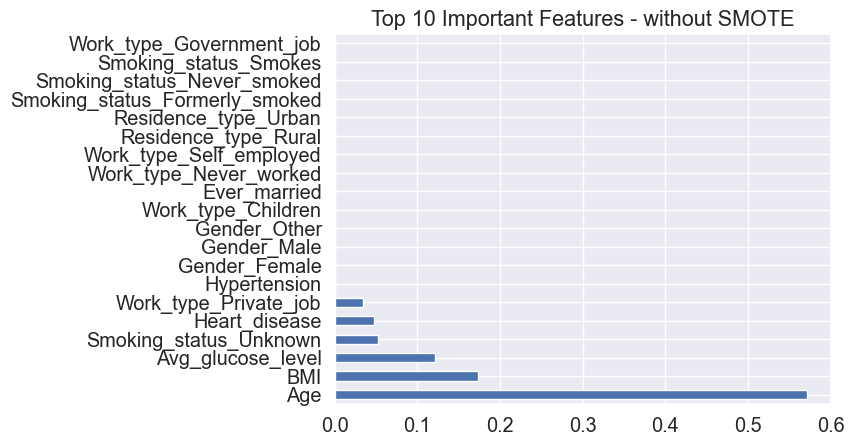

In [1935]:
# Plotting top 10 feature importances of the classification tree
feature_importances = pd.Series(dtree_tuned.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.title("Top 10 Important Features - without SMOTE")
plt.show()

**With SMOTE**

In [1936]:
# Applying feature_importances_ on the classification tree
dtree_imp = list(dtree_tuned_res.feature_importances_)

dtree_colname = list(X_train_res.columns)

#Create dict for datafram
dtree_dict = {'Feature':dtree_colname,'Importance':dtree_imp}

# Creating a dataframe with the feature importance values
dtree_feature_imp = pd.DataFrame(dtree_dict)

# Ranking the features according to feature importance values
dtree_feature_rank_res = dtree_feature_imp.sort_values(by='Importance', ascending=False)

# Print ranked
dtree_feature_rank_res

# Print top N features
#dtree_feature_rank_res.head(10)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_


,Feature,Importance
0,Age,0.567032
7,Gender_Male,0.137172
6,Gender_Female,0.085930
10,Work_type_Government_job,0.063491
12,Work_type_Private_job,0.046111
13,Work_type_Self_employed,0.043701
17,Smoking_status_Never_smoked,0.024912
2,BMI,0.012413
19,Smoking_status_Unknown,0.009816
5,Avg_glucose_level,0.009422


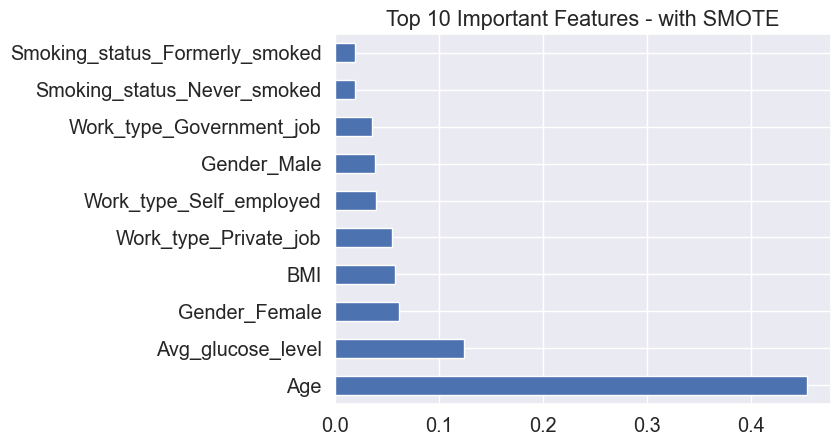

In [1937]:
# Plotting top 10 feature importances of the classification tree  - WITH SMOTE
feature_importances_res = pd.Series(dtree_res.feature_importances_, index=X.columns)
feature_importances_res.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - with SMOTE")
plt.show()

##### RFECV
Dette afsnit er kun for test af hvordan man kan bruge RFECV til at finde important features. 
Brugt fra:
-  https://practicaldatascience.co.uk/machine-learning/how-to-use-recursive-feature-elimination-in-your-models
- Simones

**Without SMOTE**

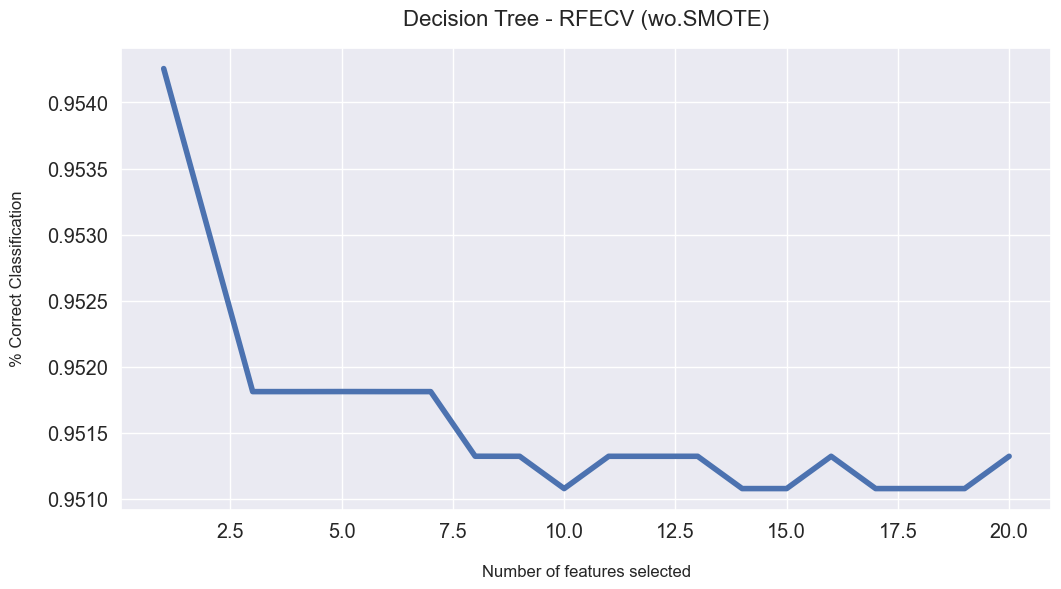

In [1938]:
# Using RFECV to identify most important features in regard to accuracy

# Defining the selector
dtree_rfecv = RFECV(estimator=dtree_tuned, 
              step=1, 
              cv=StratifiedKFold(6), # Cross-validation for evaluation model
              scoring='accuracy')

# Fitting selector to training set
dtree_rfecv.fit(X_train, y_train)

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.title('Decision Tree - RFECV (wo.SMOTE)', fontsize=16, pad=16)
plt.xlabel('Number of features selected', fontsize=12, labelpad=16)
plt.ylabel('% Correct Classification', fontsize=12, labelpad=16)
plt.plot(range(1, len(dtree_rfecv.cv_results_['mean_test_score']) + 1), dtree_rfecv.cv_results_['mean_test_score'], linewidth=4)
plt.show()

In [1939]:
# Feature importance - after applying RFECV
dtree_rfecv_imp = dtree_rfecv.estimator_.feature_importances_

# Creating new X
X_copy = X_train.copy()
X_imp = X_copy.drop(X_copy.columns[np.where(dtree_rfecv.support_ == False)[0]], axis=1, inplace=True)

# Getting column names
dtree_colname = list(X_copy.columns)

# Creating dict for dataframe
rfecv_dict = {'Feature':dtree_colname,'Importance':dtree_rfecv_imp}

# Create dataframe
rfecv_feature_imp = pd.DataFrame(rfecv_dict).sort_values(by='Importance',ascending = False)

# Print
rfecv_feature_imp

,Feature,Importance
0,Age,1.0


In [1940]:
# Printing results
print('Optimal amount of features:',dtree_rfecv.n_features_)

# Name of the optimal features listed by the RFECV
print('Selected features:', list(X_train.columns[dtree_rfecv.support_]))

Optimal amount of features: 1
Selected features: ['Age']


**With SMOTE**

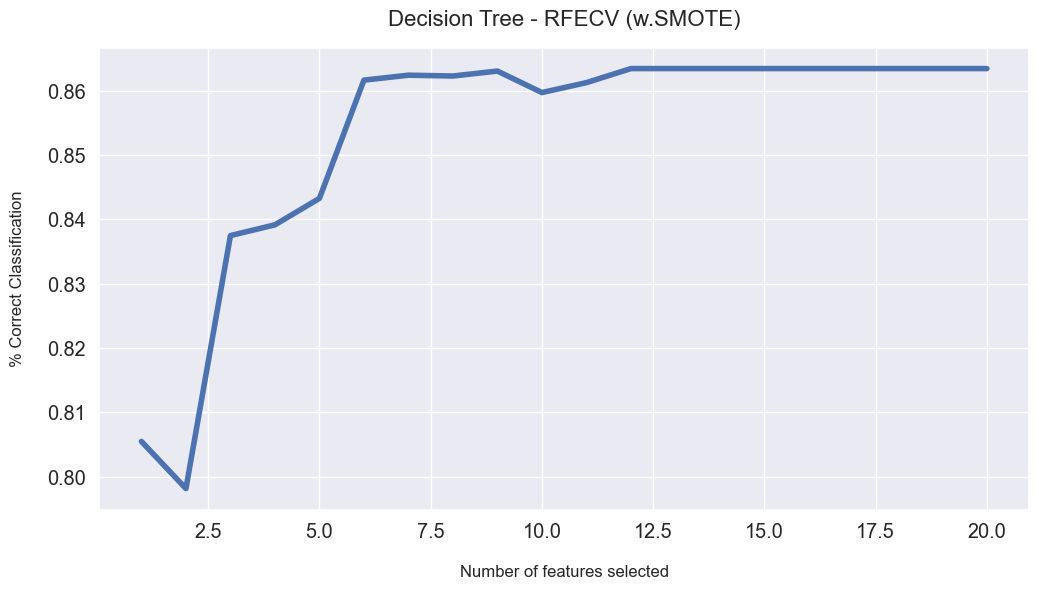

In [1941]:
# Using RFECV to identify most important features in regard to accuracy

# Defining the selector
dtree_rfecv_res = RFECV(estimator=dtree_tuned_res, 
              step=1, 
              cv=StratifiedKFold(6), # Cross-validation for evaluation model
              scoring='accuracy')


# Fitting selector to training set
dtree_rfecv_res.fit(X_train_res, y_train_res)

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.title('Decision Tree - RFECV (w.SMOTE)', fontsize=16, pad=16)
plt.xlabel('Number of features selected', fontsize=12, labelpad=16)
plt.ylabel('% Correct Classification', fontsize=12, labelpad=16)
plt.plot(range(1, len(dtree_rfecv_res.cv_results_['mean_test_score']) + 1), dtree_rfecv_res.cv_results_['mean_test_score'], linewidth=4)
plt.show()

In [1942]:
# Feature importance - after applying RFECV
dtree_rfecv_imp_res = dtree_rfecv_res.estimator_.feature_importances_

# Creating new X
X_copy = X_train.copy()
X_imp_res = X_copy.drop(X_copy.columns[np.where(dtree_rfecv_res.support_ == False)[0]], axis=1, inplace=True)

# Getting column names
dtree_colname = list(X_copy.columns)

# Creating dict for dataframe
rfecv_dict = {'Feature':dtree_colname,'Importance':dtree_rfecv_imp_res}

#Create dataframe
rfecv_feature_imp_res = pd.DataFrame(rfecv_dict).sort_values(by='Importance',ascending = False)
# Print
rfecv_feature_imp_res

,Feature,Importance
0,Age,0.567032
4,Gender_Male,0.137172
3,Gender_Female,0.085930
5,Work_type_Government_job,0.063491
6,Work_type_Private_job,0.046111
7,Work_type_Self_employed,0.043701
9,Smoking_status_Never_smoked,0.024912
1,BMI,0.012413
11,Smoking_status_Unknown,0.009816
2,Avg_glucose_level,0.009422


In [1943]:
# Printing results
print('Optimal amount of features:',dtree_rfecv_res.n_features_)

# Name of the optimal features listed by the RFECV
print('Selected features:', list(X_train.columns[dtree_rfecv_res.support_]))

Optimal amount of features: 12
Selected features: ['Age', 'BMI', 'Avg_glucose_level', 'Gender_Female', 'Gender_Male', 'Work_type_Government_job', 'Work_type_Private_job', 'Work_type_Self_employed', 'Smoking_status_Formerly_smoked', 'Smoking_status_Never_smoked', 'Smoking_status_Smokes', 'Smoking_status_Unknown']


#### Tuning model

- Optimized hyperparameters
- Selected important features

**Without SMOTE**

In [1944]:
# Using the tuned model to predict y using test set
y_dtree_pred = dtree_rfecv.predict(X_test)

**With SMOTE**

In [1945]:
# Using the tuned model to predict y using test set
y_dtree_pred_res = dtree_rfecv_res.predict(X_test)

#### Reporting scores

We will now compute the accuracy score of the predicted values to evaluate how well the tuned model is classifying new cases.

*Source:* https://scikit-learn.org/stable/modules/model_evaluation.html

**Without SMOTE**

In [1946]:
# Printing scores on training and testing set
print("---------- Without SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(dtree_tuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(dtree_tuned.score(X_test, y_test)))

# Alternative:
# Calculating accuracy by hand
#print('Accuracy: ', sum(y_test==y_pred)/len(y_test)) # by hand

# Calcylating accuracy by using metrics library
#from sklearn import metrics 
#print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

---------- Without SMOTE ----------
Accuracy on training set: 0.957
Accuracy on testing set: 0.937


In [1947]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_dtree_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9393    1.0000    0.9687       960
           1     0.0000    0.0000    0.0000        62

    accuracy                         0.9393      1022
   macro avg     0.4697    0.5000    0.4844      1022
weighted avg     0.8823    0.9393    0.9100      1022



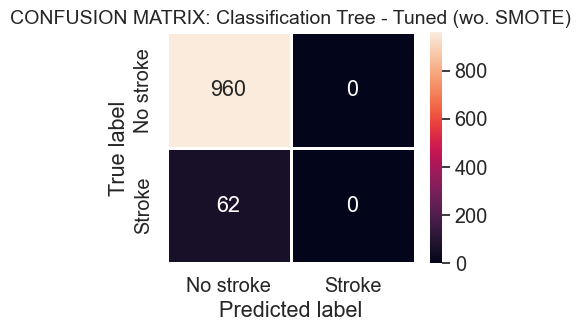

In [1948]:
# Plottting confusion matrix using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
ax = plt.subplot()
sns.heatmap(
    confusion_matrix(
        y_test,
        y_dtree_pred
    ),
    annot=True,
    fmt = "d",
    linewidths=2
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CONFUSION MATRIX: Classification Tree - Tuned (wo. SMOTE)",fontsize=14)
ax.xaxis.set_ticklabels(['No stroke', 'Stroke']); 
ax.yaxis.set_ticklabels(['No stroke', 'Stroke'])
plt.show()

**With SMOTE**

In [1949]:
# Printing scores on training and testing set
print("---------- With SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(dtree_tuned_res.score(X_train_res, y_train_res)))
print("Accuracy on testing set: {:.3f}".format(dtree_tuned_res.score(X_test, y_test)))

---------- With SMOTE ----------
Accuracy on training set: 0.870
Accuracy on testing set: 0.815


In [1950]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_dtree_pred_res, digits=4))

              precision    recall  f1-score   support

           0     0.9730    0.8260    0.8935       960
           1     0.1932    0.6452    0.2974        62

    accuracy                         0.8151      1022
   macro avg     0.5831    0.7356    0.5955      1022
weighted avg     0.9257    0.8151    0.8574      1022



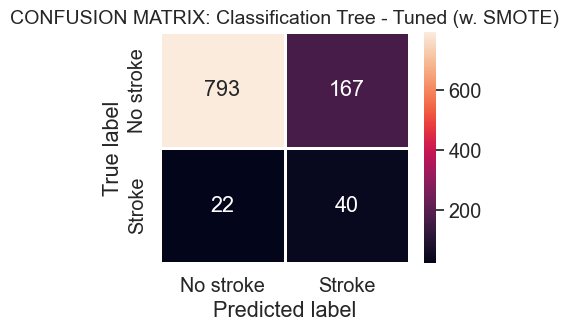

In [1951]:
# Plottting confusion matrix using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
ax = plt.subplot()
sns.heatmap(
    confusion_matrix(
        y_test,
        y_dtree_pred_res
    ),
    annot=True,
    fmt = "d",
    linewidths=2
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CONFUSION MATRIX: Classification Tree - Tuned (w. SMOTE)",fontsize=14)
ax.xaxis.set_ticklabels(['No stroke', 'Stroke']); 
ax.yaxis.set_ticklabels(['No stroke', 'Stroke'])
plt.show()

**Interpretation:**

- TODO: Hvorfor bliver precision og recall score 0? - TJEK

#### Visualization of tuned classification trees

**Without SMOTE**

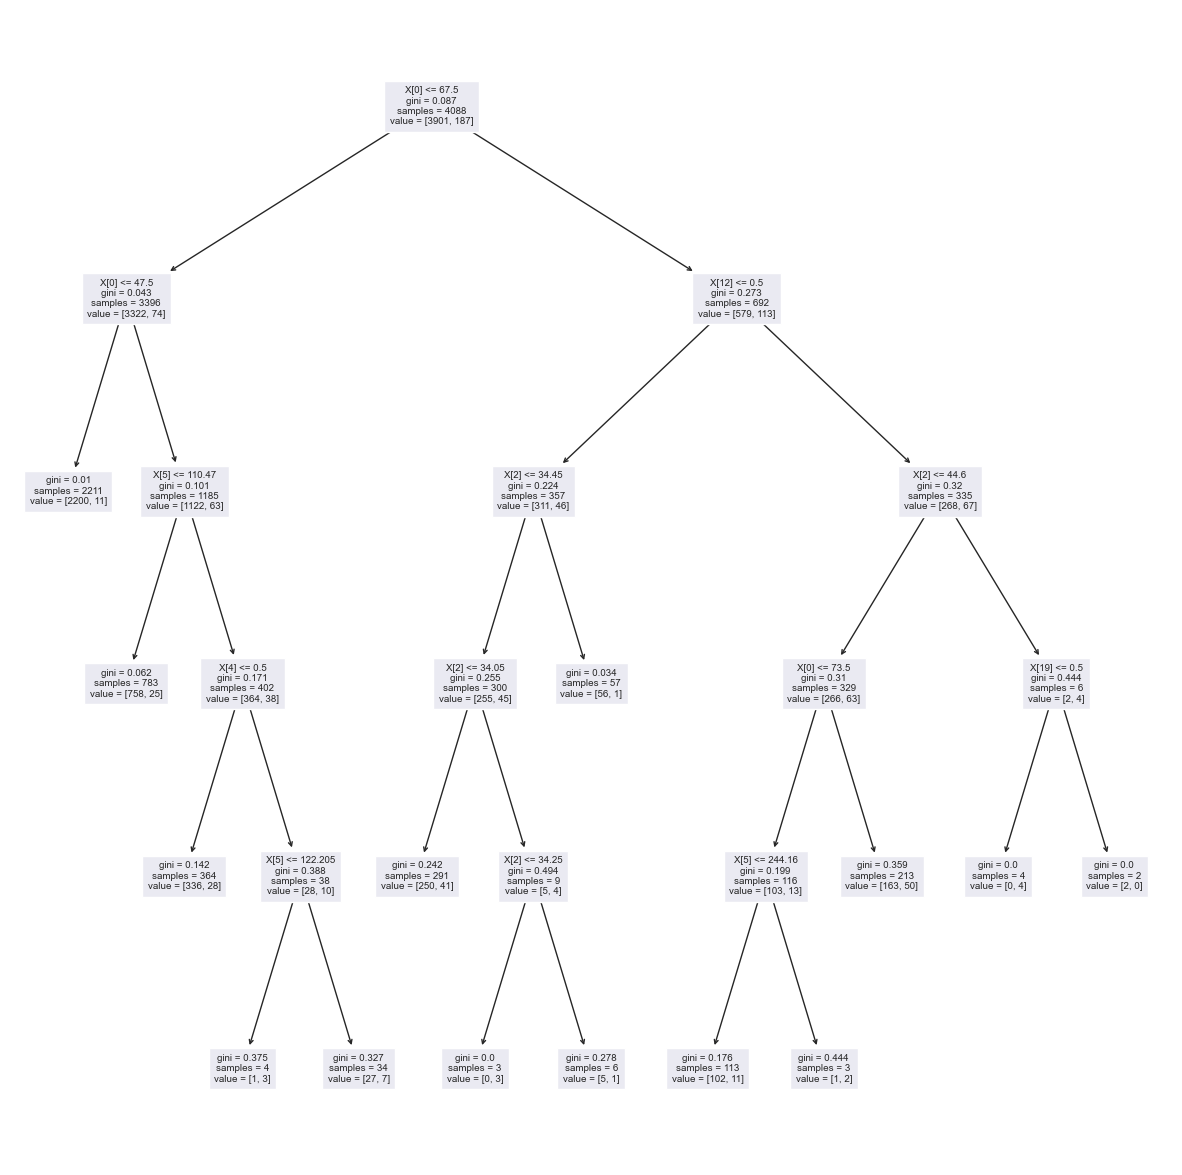

In [1952]:
# Visualizing the new tuned, pruned trees like we did above
plt.figure(figsize=(15,15))  # set plot size (denoted in inches)
tree.plot_tree(dtree_tuned, fontsize=7)
plt.show()

**With SMOTE**

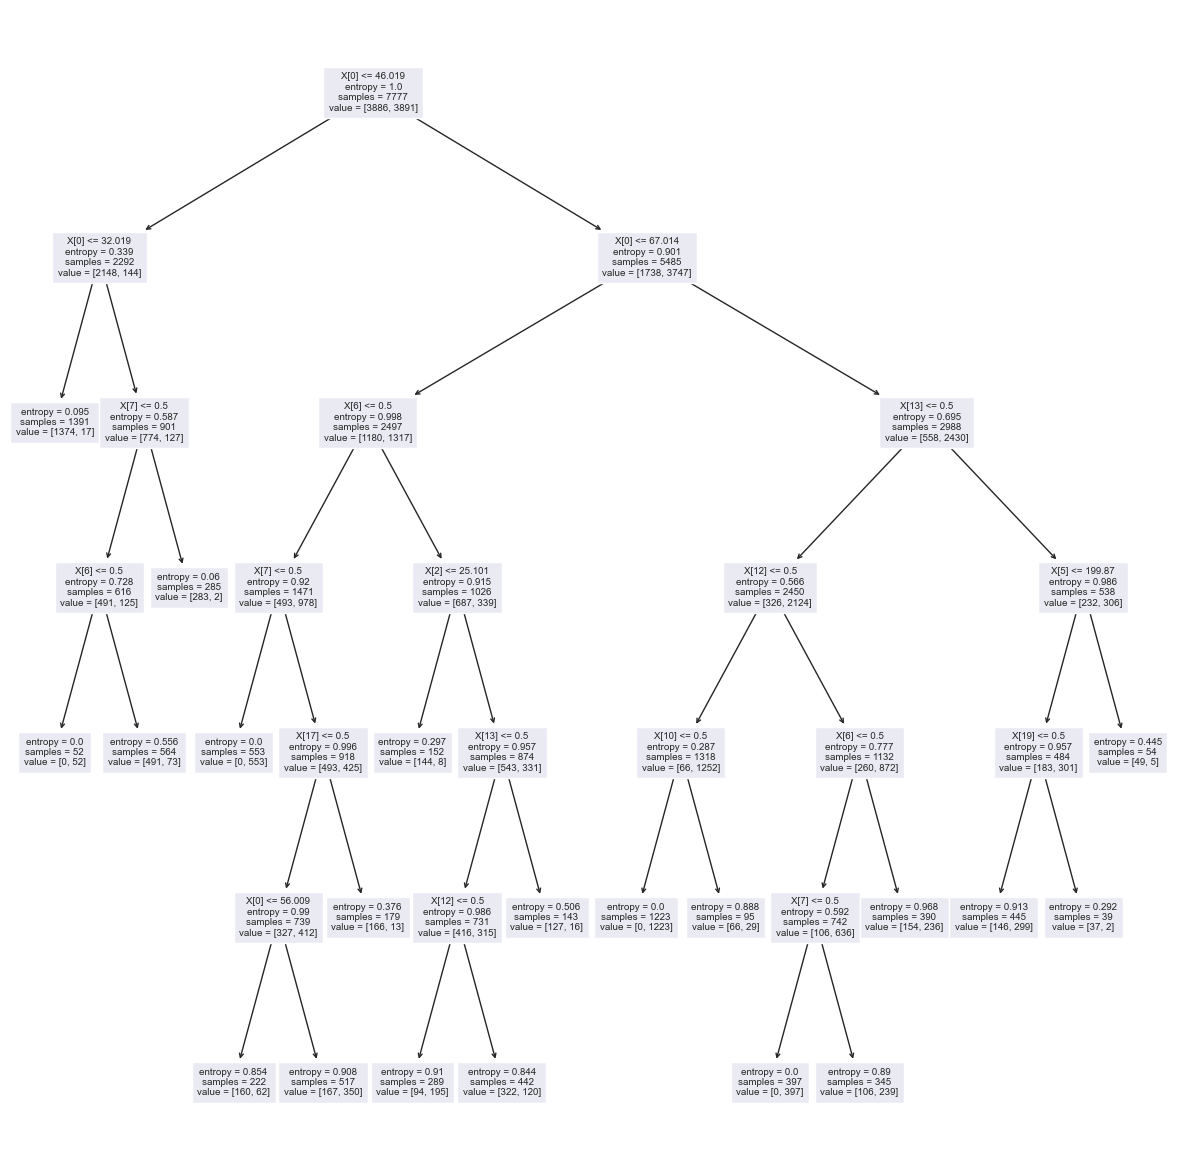

In [1953]:
# Visualizing the new tuned, pruned tree
plt.figure(figsize=(15,15))  # set plot size (denoted in inches)
tree.plot_tree(dtree_tuned_res, fontsize=7)
# plt.savefig('Classification Tree with SMOTE.png')
plt.show()

### 2. Logistic Regression
TODO: omskriv
"Logistic regression predicts a class value for a a variable based on the value of another variable. Although the model has regression in its name, logistic regression is for classification tasks with a categorical target variable."

*Source:* Lecture 4

#### Initial model

**Without SMOTE**

In [1954]:
# Building initial Logistic Regression Model to predict 'Stroke'. 
logr = LogisticRegression(max_iter=10000, random_state = 42)

# Train - Fitting the model to training set
logr = logr.fit(X_train, y_train)

# Predict target values (y) for new data in test set
y_logr_pred = logr.predict(X_test)

# -- Classification report -- 
# Calculating K-Fold Cross-Validation score
accuracies = cross_val_score(estimator = logr, X = X_train, y = y_train, cv = 10)   

# Reporting scores on training and testing set 
print("---------- WITHOUT SMOTE ----------")
print("Accuracy-score on training set: {:.3f}".format(logr.score(X_train, y_train)))
print("Accuracy-score on test set: {:.3f}\n".format(logr.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores

---------- WITHOUT SMOTE ----------
Accuracy-score on training set: 0.955
Accuracy-score on test set: 0.939

K-Fold Validation Mean Accuracy: 95.43 %
0.95 accuracy with a standard deviation of 0.00


In [1955]:
# Print classification report
print(classification_report(y_test,y_logr_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9393    1.0000    0.9687       960
           1     0.0000    0.0000    0.0000        62

    accuracy                         0.9393      1022
   macro avg     0.4697    0.5000    0.4844      1022
weighted avg     0.8823    0.9393    0.9100      1022



In [ ]:
# Reporting the regression coefficiens
coefficient = logr.coef_ 

print('Regression coefficients:')
print('---- without SMOTE: ---- ')
print(coefficient)

**Interpretation:**
TODO
- **Regression Coefficient:** "There's a value for each of the 6 possible house types. Technically, each coefficient is different, but because they're basically 0 and rounded, they look the same here.
Why are they all basically 0? Well, there's basically no association between house type and price. We can also see this in the very bad fit of the model to the data: *^2 = 0.083." (lecture 4)

The change in the log-odds ratio for y per unit change in x; the change in log odds of a patient having stroke for each attribute.
When exponentiated, this becomes the change in the odds ratio for y per unit change in X.

In [ ]:
# Investegating the coefficient
odds = np.exp(coefficient)

print('Exponentiated log-odds ratio')
print('---- without SMOTE: ---- ')
print(odds)

Interpretation:
- This means that on average, for an increase of 1 in age, the odds that the patient will have a stroke is 1.08 (with SMOTE) — meaning the odds increase only a little. For examlpe, 1 would mean no effect at all.
- TODO: tjek denne forklaring er rigtig

**With SMOTE**

In [2063]:
# Building initial Logistic Regression Model
logr_res = LogisticRegression(max_iter=10000, random_state = 42)

# Fitting model to training data
logr_res = logr_res.fit(X_train_res, y_train_res)

# Predicting X in testing data
y_logr_pred_res = logr_res.predict(X_test)

# -- Classification report -- 

# Calculating K-Fold Cross-Validation score
accuracies_res = cross_val_score(estimator = logr_res, X = X_train_res, y = y_train_res, cv = 10)   

# Reporting scores on training and testing set 
print("---------- WITH SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(logr_res.score(X_train_res, y_train_res)))
print("Accuracy on test set: {:.3f}\n".format(logr_res.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies_res.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores

---------- WITH SMOTE ----------
Accuracy on training set: 0.958
Accuracy on test set: 0.941

K-Fold Validation Mean Accuracy: 95.74 %
0.96 accuracy with a standard deviation of 0.01


In [1957]:
# Print classification report
print(classification_report(y_test,y_logr_pred_res, digits=4))

              precision    recall  f1-score   support

           0     0.9447    0.9958    0.9696       960
           1     0.6000    0.0968    0.1667        62

    accuracy                         0.9413      1022
   macro avg     0.7723    0.5463    0.5681      1022
weighted avg     0.9238    0.9413    0.9209      1022



**Interpretation:**
- **Accuracy-score:** The logistic regression score is a measure of the mean accuracy on the given data. 




In [1958]:
# Reporting the regression coefficiens
coefficient_res = logr_res.coef_ 

print('---- with SMOTE: ---- ')
print(coefficient_res)
# 

Regression coefficients:
---- without SMOTE: ---- 
[[ 0.07506045 -0.28751489  0.00485214  0.34769874  0.26830673  0.00375515
  -0.01981869  0.00576539  0.          0.64263056 -0.17954457 -0.10978078
   0.01356192 -0.38092041 -0.02176764  0.00771435 -0.07007493 -0.12732259
   0.19148097 -0.00813674]]
---- with SMOTE: ---- 
[[ 8.36103974e-02 -4.63544689e-01  1.49805646e-02 -2.09411787e-01
  -1.26440260e-01  4.64558390e-03 -4.34307569e+00 -4.14653888e+00
  -2.14254763e-01 -2.12593899e+00 -4.29008291e+00 -8.86874816e-01
  -3.67242681e+00 -4.27244765e+00 -4.42258598e+00 -4.43592488e+00
  -4.53480895e+00 -4.39613535e+00 -4.39727050e+00 -4.67663153e+00]]


**Interpretation:**
- **Regression Coefficient:** "There's a value for each of the 6 possible house types. Technically, each coefficient is different, but because they're basically 0 and rounded, they look the same here.
Why are they all basically 0? Well, there's basically no association between house type and price. We can also see this in the very bad fit of the model to the data: *^2 = 0.083." (lecture 4)

The change in the log-odds ratio for y per unit change in x; the change in log odds of a patient having stroke for each attribute.
When exponentiated, this becomes the change in the odds ratio for y per unit change in X.


In [1959]:
# Investegating the coefficient
coefficient_res = logr_res.coef_ 
odds_res = np.exp(coefficient_res)
print('---- with SMOTE: ---- ')
print(odds_res)

Exponentiated log-odds ratio
---- without SMOTE: ---- 
[[1.07794931 0.7501254  1.00486393 1.41580566 1.30774821 1.00376221
  0.98037641 1.00578204 1.         1.90147625 0.8356507  0.89603054
  1.0136543  0.68323227 0.97846756 1.00774418 0.93232396 0.8804496
  1.21104179 0.99189627]]
---- with SMOTE: ---- 
[[1.08720523 0.6290499  1.01509334 0.81106118 0.88122679 1.00465639
  0.01299649 0.01581907 0.80714273 0.11932087 0.01370379 0.41194114
  0.02541472 0.0139476  0.01200315 0.01184411 0.01072896 0.01232488
  0.0123109  0.00931032]]


Interpretation:
- This means that on average, for an increase of 1 in age, the odds that the patient will have a stroke is 1.08 (with SMOTE) — meaning the odds increase only a little. For examlpe, 1 would mean no effect at all.
- TODO: tjek denne forklaring er rigtig

#### Optimizing Hyperparameters - RandomizedSearchCV

##### Pipeline parameters

In [1960]:
#  Turning off  warnings as  RandomSearchCV() tends to generate quite many of warnings.
warnings.filterwarnings('ignore')

# Applying RandomizedSearchCV for hyperparameter optimization for LogisticRegression
# Declaring parameter grid to search through to use in the pipeline
parameters = {
    'max_iter' : (80,90,100,110,120,130,140,150,160,180),
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg','lbfgs','sag','saga'],
    
}

**Without SMOTE**

In [1961]:
# Creating models through RandomizedSearchCV with Standardscaler
logr_tuned_pipeline  = make_pipeline(StandardScaler(), 
                                     RandomizedSearchCV(LogisticRegression(), 
                                                        random_state = 5,
                                                        param_distributions=parameters,     # parameters
                                                        cv = 5,                             # number of folds in cross-validation
                                                        verbose = 1,                        #  >1 : computation time for each fold and parameter candidate is displayed
                                                        scoring = 'recall'))                # metric for scoring - try accuracy

# Fitting model with optimized parameters to training set
logr_tuned = logr_tuned_pipeline.fit(X_train,y_train)

# Identifying the most optimal hyperparameters
logr_tuned[1].best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'solver': 'saga', 'penalty': 'l1', 'max_iter': 130, 'C': 100.0}

**With SMOTE**

In [1962]:
# Implementing RandomizedSearchCV for the model
logr_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                        RandomizedSearchCV(LogisticRegression(), 
                                                        param_distributions=parameters,     # parameters
                                                        cv = 5,                             # number of folds in cross-validation
                                                        verbose = 1,                        #  >1 : computation time for each fold and parameter candidate is displayed
                                                        scoring = 'recall'))                # metric for scoring - try accuracy

# Fitting models to training set
logr_tuned_res = logr_tuned_pipeline_res.fit(X_train_res,y_train_res)

# Identifying the most optimal hyperparameters
logr_tuned_res[1].best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 140, 'C': 0.1}

##### Tuning models
The trained classification tree model is used to predict the outcome of the target variable y (Stroke 1 or 0) using the testing set
TODO: Tjek model er opdateret med parametre

**Without SMOTE**

In [1963]:
# Tuning model with optimized hyperparameters
logr_tuned = LogisticRegression(solver='saga', max_iter=130, penalty='l1', C= 100.0)

# Train - Fitting model to training set 
logr_tuned.fit(X_train, y_train)

# Predict y using test set
y_logr_pred = logr_tuned.predict(X_test)

# Reporting test scores
print('Accuracy of Logistic Regression classifier on test set (without RFECV): {:.10f}'.format(logr_tuned.score(X_test, y_test)))


Accuracy of Logistic Regression classifier on test set (without RFECV): 0.9393346380


In [1964]:
# Printing classification report
print(classification_report(y_test,y_logr_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9402    0.9990    0.9687       960
           1     0.5000    0.0161    0.0312        62

    accuracy                         0.9393      1022
   macro avg     0.7201    0.5075    0.5000      1022
weighted avg     0.9135    0.9393    0.9118      1022



**With SMOTE**

In [1965]:
# Tuning model with optimized hyperparameters
logr_tuned_res = LogisticRegression(solver='sag', max_iter=80, penalty='l2', C= 100.0)

# Train - Fitting model to training set 
logr_tuned_res.fit(X_train_res, y_train_res)

# Predict y using test set
y_logr_pred_res= logr_tuned_res.predict(X_test)


# Reporting test scores
print('Accuracy of Logistic Regression classifier on test set (without RFECV): {:.10f}'.format(logr_tuned_res.score(X_test, y_test)))


Accuracy of Logistic Regression classifier on test set (without RFECV): 0.8708414873


In [1966]:
# Printing classification report
print(classification_report(y_test,y_logr_pred_res, digits=4))

              precision    recall  f1-score   support

           0     0.9641    0.8958    0.9287       960
           1     0.2308    0.4839    0.3125        62

    accuracy                         0.8708      1022
   macro avg     0.5974    0.6899    0.6206      1022
weighted avg     0.9196    0.8708    0.8913      1022



#### Selecting Important Features
TODO: Hvad betyder det her? skal det med, eller udelades? I så fald forklar hvad det viser

*Soure:*
https://machinelearningmastery.com/rfe-feature-selection-in-python/

##### Feature Importance

**Without SMOTE**

In [1967]:
# Using model with tuned parameters
importance = logr_tuned.coef_[0]

logr_imp = list(importance)

# Getting column names 
logr_colname = list(X_train.columns)

# Making a dict for dataframe
logr_dict = {'Column_Names_rfc':logr_colname,'coaf':logr_imp}

# Creating a dataframe with the feature importance values
logr_feature_imp = pd.DataFrame(logr_dict)

# Ranking the features according to feature importance values
logr_feature_rank = logr_feature_imp.sort_values(by='coaf',ascending = False)
 
# Print ranked
logr_feature_rank

# Print top N features
#logr_feature_rank.head(10)

,Column_Names_rfc,coaf
3,Hypertension,0.062461
4,Heart_disease,0.044024
0,Age,0.041017
5,Avg_glucose_level,0.000887
18,Smoking_status_Smokes,0.000235
8,Gender_Other,0.000000
16,Smoking_status_Formerly_smoked,-0.000584
11,Work_type_Never_worked,-0.002120
10,Work_type_Government_job,-0.020499
13,Work_type_Self_employed,-0.020979


**With SMOTE**

In [1968]:
# Using model with tuned parameters
importance = logr_tuned_res.coef_[0]

logr_imp = list(importance)

# Getting column names 
logr_colname = list(X_train_res.columns)

# Making a dict for dataframe
logr_dict = {'Column_Names_rfc':logr_colname,'coaf':logr_imp}

# Creating a dataframe with the feature importance values
logr_feature_imp = pd.DataFrame(logr_dict)

# Ranking the features according to feature importance values
logr_feature_rank_res = logr_feature_imp.sort_values(by='coaf',ascending = False)
 
# Print ranked
logr_feature_rank_res

# Print top N features
#logr_feature_rank_res.head(10)

,Column_Names_rfc,coaf
0,Age,0.063689
5,Avg_glucose_level,0.003473
8,Gender_Other,-0.001222
11,Work_type_Never_worked,-0.009501
2,BMI,-0.025437
4,Heart_disease,-0.172999
9,Work_type_Children,-0.184954
3,Hypertension,-0.228986
1,Ever_married,-0.379910
18,Smoking_status_Smokes,-0.507606


##### RFECV

*Sources*
-  https://practicaldatascience.co.uk/machine-learning/how-to-use-recursive-feature-elimination-in-your-models
- Simones

**Without SMOTE**

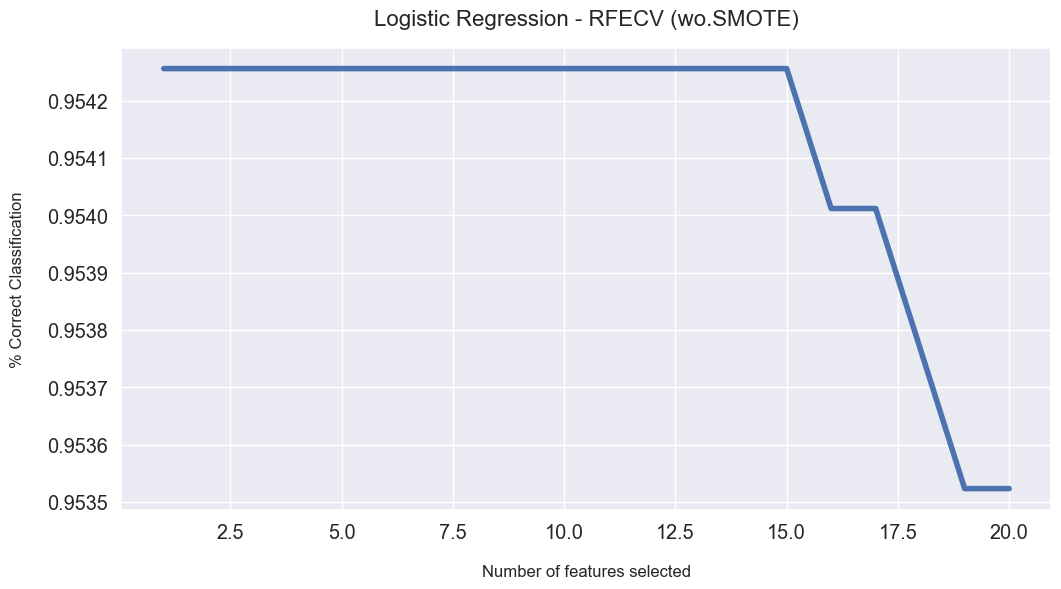

In [1969]:
# Using RFECV with Logistic Regression to identify the imortant features in regards to accuracy

# Defining the selector
logr_rfecv = RFECV(estimator=logr_tuned, 
              step=1, 
              cv=StratifiedKFold(6), # Cross-validation for evaluation model
              scoring='accuracy')

# Fitting selector to training set
logr_rfecv.fit(X_train, y_train)

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.title('Logistic Regression - RFECV (wo.SMOTE)', fontsize=16, pad=16)
plt.xlabel('Number of features selected', fontsize=12, labelpad=16)
plt.ylabel('% Correct Classification', fontsize=12, labelpad=16)
plt.plot(range(1, len(logr_rfecv.cv_results_['mean_test_score']) + 1), logr_rfecv.cv_results_['mean_test_score'], linewidth=4)
plt.show()


# https://practicaldatascience.co.uk/machine-learning/how-to-use-recursive-feature-elimination-in-your-models

In [1970]:
#Print results
print('Optimal feature amount:',logr_rfecv.n_features_)

# Here we look into our orignal columns to see which are listen in our Recursive model of features
print('Selected features:', list(X_train.columns[logr_rfecv.support_]))


Optimal feature amount: 1
Selected features: ['Work_type_Self_employed']


**With SMOTE**

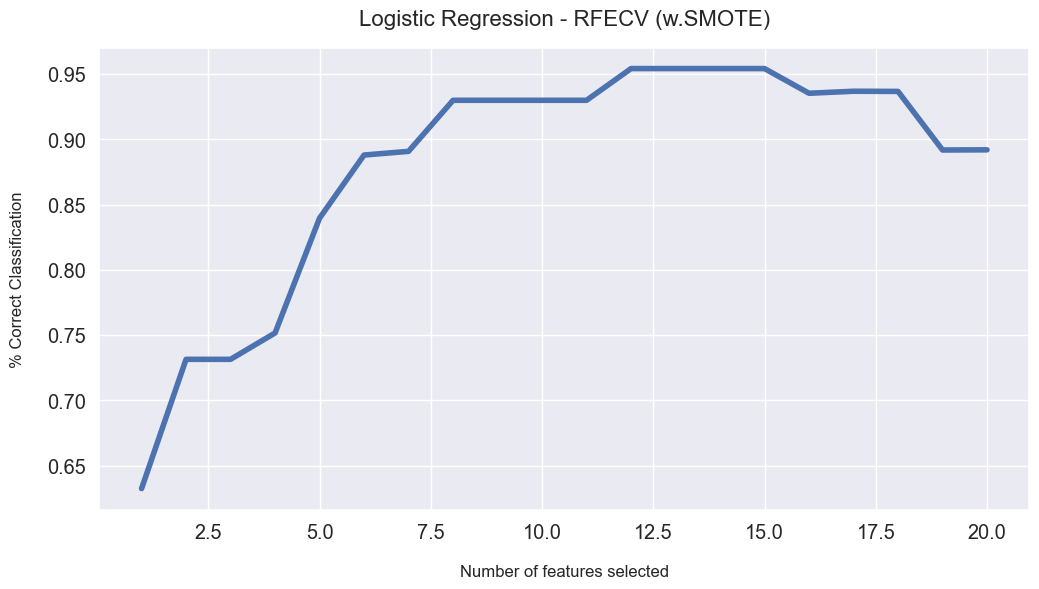

In [1971]:
# Using RFECV to identify most important features in regard to accuracy

# Defining the selector
logr_rfecv_res = RFECV(estimator=logr_tuned_res, 
              step=1, 
              cv=StratifiedKFold(6), # Cross-validation for evaluation model
              scoring='accuracy')

# Fitting selector to training set
logr_rfecv_res.fit(X_train_res, y_train_res)

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.title('Logistic Regression - RFECV (w.SMOTE)', fontsize=16, pad=16)
plt.xlabel('Number of features selected', fontsize=12, labelpad=16)
plt.ylabel('% Correct Classification', fontsize=12, labelpad=16)
plt.plot(range(1, len(logr_rfecv_res.cv_results_['mean_test_score']) + 1), logr_rfecv_res.cv_results_['mean_test_score'], linewidth=4)
plt.show()

In [1972]:
# Printing results
print('Optimal amount of features:',logr_rfecv_res.n_features_)

# Name of the optimal features listed by the RFECV
print('Selected features:', list(X_train_res.columns[logr_rfecv_res.support_]))

Optimal amount of features: 12
Selected features: ['Gender_Female', 'Gender_Male', 'Work_type_Children', 'Work_type_Government_job', 'Work_type_Private_job', 'Work_type_Self_employed', 'Residence_type_Rural', 'Residence_type_Urban', 'Smoking_status_Formerly_smoked', 'Smoking_status_Never_smoked', 'Smoking_status_Smokes', 'Smoking_status_Unknown']


#### Tuning model

- Optimized hyperparameters
- Selected important features

**Without SMOTE**

In [1973]:
# Using the tuned model to predict y using test set
y_logr_pred = logr_rfecv.predict(X_test)

**With SMOTE**

In [1974]:
# Using the tuned model to predict y using test set
y_logr_pred_res = logr_rfecv_res.predict(X_test)

#### Reporting Scores

**Without SMOTE**

In [1975]:
# Printing scores on training and testing set
print("---------- Without SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(logr_rfecv.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(logr_rfecv.score(X_test, y_test)))

---------- Without SMOTE ----------
Accuracy on training set: 0.954
Accuracy on testing set: 0.939


In [1976]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_logr_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9393    1.0000    0.9687       960
           1     0.0000    0.0000    0.0000        62

    accuracy                         0.9393      1022
   macro avg     0.4697    0.5000    0.4844      1022
weighted avg     0.8823    0.9393    0.9100      1022



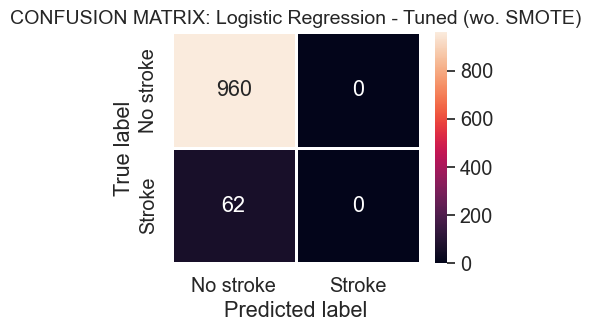

In [1977]:
# Plottting confusion matrix using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
ax = plt.subplot()
sns.heatmap(
    confusion_matrix(
        y_test,
        y_logr_pred
    ),
    annot=True,
    fmt = "d",
    linewidths=2
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CONFUSION MATRIX: Logistic Regression - Tuned (wo. SMOTE)",fontsize=14)
ax.xaxis.set_ticklabels(['No stroke', 'Stroke']); 
ax.yaxis.set_ticklabels(['No stroke', 'Stroke'])
plt.show()

**With SMOTE**

In [1978]:
# Printing scores on training and testing set
print("---------- With SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(logr_rfecv_res.score(X_train_res, y_train_res)))
print("Accuracy on testing set: {:.3f}".format(logr_rfecv_res.score(X_test, y_test)))

---------- With SMOTE ----------
Accuracy on training set: 0.954
Accuracy on testing set: 0.936


In [1979]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_logr_pred_res, digits=4))

              precision    recall  f1-score   support

           0     0.9392    0.9969    0.9672       960
           1     0.0000    0.0000    0.0000        62

    accuracy                         0.9364      1022
   macro avg     0.4696    0.4984    0.4836      1022
weighted avg     0.8822    0.9364    0.9085      1022



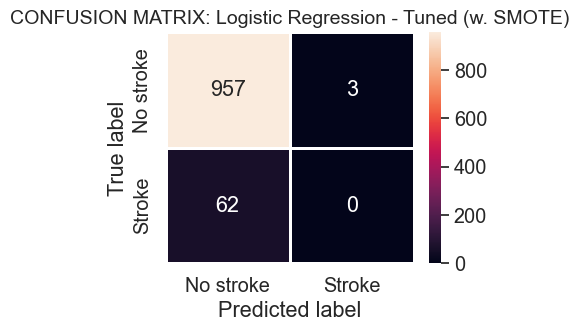

In [1980]:
# Plottting confusion matrix using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
ax = plt.subplot()
sns.heatmap(
    confusion_matrix(
        y_test,
        y_logr_pred_res
    ),
    annot=True,
    fmt = "d",
    linewidths=2
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CONFUSION MATRIX: Logistic Regression - Tuned (w. SMOTE)",fontsize=14)
ax.xaxis.set_ticklabels(['No stroke', 'Stroke']); 
ax.yaxis.set_ticklabels(['No stroke', 'Stroke'])
plt.show()

##### Feature Coef with RFECV

**Without SMOTE**

In [1981]:
# Extracting the coef
logr_rfecv_imp = list(logr_rfecv.estimator_.coef_[0])

# Creating new X
X_copy= X.copy()

X_imp = X_copy.drop(X_copy.columns[np.where(logr_rfecv.support_ == False)[0]], axis=1, inplace=True)

# Getting column names
logr_colname = list(X_copy.columns)

# Creating dict for dataframe
rfecv_dict = {'Feature':logr_colname,'Coaf':logr_rfecv_imp}

# Create dataframe and sort for coef
rfecv_feature_coef = pd.DataFrame(rfecv_dict).sort_values(by='Coaf',ascending = False)

# Print Feature Coef w. RFECV
rfecv_feature_coef

,Feature,Coaf
0,Work_type_Self_employed,0.623845


**With SMOTE**
TODO: Somethigns wrong

In [1982]:
# Extracting the coef
logr_rfecv_imp_res = list(logr_rfecv_res.estimator_.coef_[0])

# Creating new X
X_copy= X.copy()

X_imp = X_copy.drop(X_copy.columns[np.where(logr_rfecv_res.support_ == False)[0]], axis=1, inplace=True)

# Getting column names
logr_colname = list(X_copy.columns)

# Creating dict for dataframe
rfecv_dict = {'Feature':logr_colname,'Coaf':logr_rfecv_imp_res}

# Create dataframe and sort for coef
rfecv_feature_coef_res = pd.DataFrame(rfecv_dict).sort_values(by='Coaf',ascending = False)

# Print Feature Coef w. RFECV
rfecv_feature_coef_res

,Feature,Coaf
5,Work_type_Self_employed,-4.416615
4,Work_type_Private_job,-4.620075
3,Work_type_Government_job,-5.193883
1,Gender_Male,-6.952278
0,Gender_Female,-7.282233
2,Work_type_Children,-8.264506
8,Smoking_status_Formerly_smoked,-10.076729
9,Smoking_status_Never_smoked,-10.208885
10,Smoking_status_Smokes,-10.602184
11,Smoking_status_Unknown,-10.705719


##### K-fold cross-validation - bruges ikke

*Source:* Lecture 6 (Ikke sikkert vi skal bruge det)

In [1983]:
# ---------- without SMOTE----------
scores = cross_val_score(logr, X_train, y_train, cv=10)
print("---------- Without SMOTE ----------")
print(scores)

# ---------- without SMOTE----------
scores_res = cross_val_score(logr, X_train_res, y_train_res, cv=10)
print("\n---------- With SMOTE ----------")
print(scores_res)

---------- Without SMOTE ----------
[0.95599022 0.95354523 0.95354523 0.95354523 0.95354523 0.95354523
 0.95354523 0.95354523 0.95588235 0.95588235]

---------- With SMOTE ----------
[0.94601542 0.95115681 0.9562982  0.96015424 0.95501285 0.95886889
 0.96786632 0.97425997 0.94980695 0.95495495]


In [1984]:
#Using this to report the mean and standard deviation of test scores
# ---------- without SMOTE----------
print("---------- Without SMOTE ----------")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
# ---------- with SMOTE----------

print("\n---------- With SMOTE ----------")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_res.mean(), scores_res.std()))

---------- Without SMOTE ----------
0.95 accuracy with a standard deviation of 0.00

---------- With SMOTE ----------
0.96 accuracy with a standard deviation of 0.01


### KNN Classifier
*Source:* Session 6

#### Initial model

**Without SMOTE**

In [1985]:
# Creating an initial  KNeighbors Classifier Model 
neigh = KNeighborsClassifier()

# Train - Fitting the model to training set
neigh = neigh.fit(X_train, y_train)

# Predict target values (y) for new data in test set
y_neigh_pred = neigh.predict(X_test)

# -- Classification report -- 
# Calculating K-Fold Cross-Validation score
accuracies = cross_val_score(estimator = neigh, X = X_train, y = y_train, cv = 10)   

# Reporting scores on training and testing set 
print("---------- WITHOUT SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(neigh.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(neigh.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores


---------- WITHOUT SMOTE ----------
Accuracy on training set: 0.955
Accuracy on test set 0.935
K-Fold Validation Mean Accuracy: 94.94 %
0.95 accuracy with a standard deviation of 0.00


In [1986]:
# Print classification report
print(classification_report(y_test,y_neigh_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9391    0.9958    0.9666       960
           1     0.0000    0.0000    0.0000        62

    accuracy                         0.9354      1022
   macro avg     0.4695    0.4979    0.4833      1022
weighted avg     0.8821    0.9354    0.9080      1022



**With SMOTE**

In [1987]:
# Building an initial KNeighbors Classifier 
neigh_res = KNeighborsClassifier()

# Train - Fitting the model to training set
neigh_res = neigh_res.fit(X_train_res, y_train_res)

# Predict target values (y) for new data in test set
y_neigh_pred_res = neigh_res.predict(X_test)

# -- Classification report -- 
# Calculating K-Fold Cross-Validation score
accuracies_res = cross_val_score(estimator = logr, X = X_train, y = y_train, cv = 10)   

# Printing accuracy-score on training and testing set 
print("---------- WITH SMOTE ----------")
print("Accuracy on training set with SMOTE: {:.3f}".format(neigh_res.score(X_train_res, y_train_res)))
print("Accuracy of the model with SMOTE using testing data: {:.3f}".format(neigh_res.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies_res.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores

---------- WITH SMOTE ----------
Accuracy on training set with SMOTE: 0.916
Accuracy of the model with SMOTE using testing data: 0.851
K-Fold Validation Mean Accuracy: 95.43 %
0.95 accuracy with a standard deviation of 0.00


In [1988]:
# Print classification report
print(classification_report(y_test, y_logr_pred_res, digits=4))

              precision    recall  f1-score   support

           0     0.9392    0.9969    0.9672       960
           1     0.0000    0.0000    0.0000        62

    accuracy                         0.9364      1022
   macro avg     0.4696    0.4984    0.4836      1022
weighted avg     0.8822    0.9364    0.9085      1022



#### Optimizing Hyperparameters - RandomizedSearchCV

##### Pipeline parameters

In [1989]:
# Using RandomizedSearchCV to optimize hyperparameters for KNN Classifier
# Declaring parameters to search through 
parameters = {'n_neighbors' : (5,15,35,45,55,65,75,85,95),
             'weights' : ('uniform', 'distance')}


# Creating models through RandomizedSearchCV with Standardscaler for datasets with and without SMOTE
neigh_tuned_pipeline  = make_pipeline(StandardScaler(), 
                                    RandomizedSearchCV(KNeighborsClassifier(), 
                                                       random_state = 5, param_distributions = parameters, 
                                                       cv = 5, verbose = True, scoring = 'recall'))


# Fitting models to training set
# ---------- without SMOTE ----------


# ---------- with SMOTE ----------


**Without SMOTE**

In [1990]:
# Creating models through RandomizedSearchCV with Standardscaler for datasets with and without SMOTE
neigh_tuned_pipeline  = make_pipeline(StandardScaler(), 
                                    RandomizedSearchCV(KNeighborsClassifier(), 
                                                       random_state = 5, param_distributions = parameters, 
                                                       cv = 5, verbose = True, scoring = 'recall'))

# Fitting model to training set
neigh_tuned = neigh_tuned_pipeline.fit(X_train,y_train)

# Identifying the most optimal hyperparameters
neigh_tuned[1].best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'weights': 'distance', 'n_neighbors': 5}

**With SMOTE**

In [1991]:
# Creating models through RandomizedSearchCV with Standardscaler for datasets with and without SMOTE
neigh_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                       RandomizedSearchCV(KNeighborsClassifier(), 
                                                          random_state = 5, param_distributions = parameters, 
                                                          cv = 5, verbose = True, scoring = 'recall'))
# Fitting model to training set
neigh_tuned_res = neigh_tuned_pipeline_res.fit(X_train_res,y_train_res)

# Identifying the most optimal hyperparameters
neigh_tuned_res[1].best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'weights': 'distance', 'n_neighbors': 5}

##### Tuning models

**Without SMOTE**

In [1992]:
# Building optimized model using the identifyed hyperparameters
neigh_tuned = KNeighborsClassifier(weights='distance', n_neighbors=5)

# Train - Fitting model to training set 
neigh_tuned.fit(X_train, y_train)

# Predict y using test set
y_neigh_pred = neigh_tuned.predict(X_test)

**With SMOTE**

In [1993]:
# Building optimized model using the identifyed hyperparameters
neigh_tuned_res = KNeighborsClassifier(weights='distance', n_neighbors=5)

# Train - Fitting model to training set
neigh_tuned_res.fit(X_train_res, y_train_res)

# Predict y using test set
y_neigh_pred_res = neigh_tuned_res.predict(X_test)

#### Selecting Important Features
TODO: Hvad betyder det her? skal det med, eller udelades? I så fald forklar hvad det viser

*Soure:*
- https://machinelearningmastery.com/rfe-feature-selection-in-python/
- Mutual Information Gain: https://www.rasgoml.com/feature-engineering-tutorials/feature-selection-using-mutual-information-in-scikit-learn

**Without SMOTE**

In [1994]:
# Using multual_info_classif to select top N features
select_features = SelectKBest(mutual_info_classif, k=15)
X_reduced = select_features.fit_transform(X_train, y_train)

# Print reduced feature matrix
X_reduced.shape

(4088, 15)

In [1995]:
# Using te get_support function to generate a list of important features
cols = select_features.get_support(indices=True)
selected_features = X.iloc[:,cols].columns.tolist()
selected_features

['Age',
 'Ever_married',
 'BMI',
 'Hypertension',
 'Heart_disease',
 'Avg_glucose_level',
 'Gender_Male',
 'Gender_Other',
 'Work_type_Children',
 'Work_type_Private_job',
 'Residence_type_Rural',
 'Smoking_status_Formerly_smoked',
 'Smoking_status_Never_smoked',
 'Smoking_status_Smokes',
 'Smoking_status_Unknown']

**With SMOTE**

In [1996]:
# Using multual_info_classif to select top N features
select_features_res = SelectKBest(mutual_info_classif, k=15)
X_reduced_res = select_features_res.fit_transform(X_train_res, y_train_res) # Eller bare X_res og y_res?
# Print reduced feature matrix
X_reduced_res.shape

(7777, 15)

In [1997]:
# Using te get_support function to generate a list of important features
cols_res = select_features_res.get_support(indices=True)
selected_features_res = X_res.iloc[:,cols_res].columns.tolist()
# Print list of important features
selected_features_res

['Age',
 'Ever_married',
 'BMI',
 'Avg_glucose_level',
 'Gender_Female',
 'Gender_Male',
 'Work_type_Children',
 'Work_type_Government_job',
 'Work_type_Private_job',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'Smoking_status_Formerly_smoked',
 'Smoking_status_Never_smoked',
 'Smoking_status_Smokes',
 'Smoking_status_Unknown']

#### Tuning Models

**Without SMOTE**
- TODO: 
- Make new reduced 
- make new test train split

In [1998]:
# Using the reduced feature matrix (with important featues) to tune the model

# Creating new X using the reduced feature matrix
X_reduced = X[selected_features]

# Make new train-test Split with reduced X
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y,test_size=0.2,random_state=42)

# Train - Fitting the model to training set
neigh_tuned.fit(X_train, y_train)

# Predict y using test set
y_neigh_pred = neigh_tuned.predict(X_test)

**With SMOTE** 

In [1999]:
# Using the reduced feature matrix (with important featues) to tune the model
X_reduced_res = X_res[selected_features]

# Make new train-test Split with reduced X
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_reduced_res, y_res, test_size=0.2, random_state=42)

# Train - Fitting model to reduced training set 
neigh_tuned_res.fit(X_train_res, y_train_res)

# Predict y using test set
y_neigh_pred_res = neigh_tuned_res.predict(X_test)

#### Reporting Scores

**Without SMOTE**

In [2000]:
# ---- Classification Report ----

# Calculating K-Fold Cross-Validation score
accuracies = cross_val_score(estimator = neigh_tuned, X = X_train, y = y_train, cv = 10)   


# Printing scores on training and testing set
print("---------- Without SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(neigh_tuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(neigh_tuned.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores

---------- Without SMOTE ----------
Accuracy on training set: 1.000
Accuracy on testing set: 0.935
K-Fold Validation Mean Accuracy: 94.79 %
0.95 accuracy with a standard deviation of 0.00


In [2001]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_neigh_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9400    0.9948    0.9666       960
           1     0.1667    0.0161    0.0294        62

    accuracy                         0.9354      1022
   macro avg     0.5533    0.5055    0.4980      1022
weighted avg     0.8930    0.9354    0.9097      1022



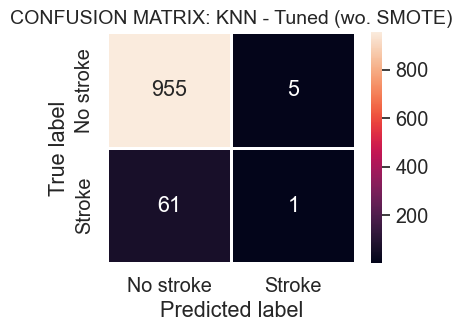

In [2002]:
# Plottting confusion matrix using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
ax = plt.subplot()
sns.heatmap(
    confusion_matrix(
        y_test,
        y_neigh_pred
    ),
    annot=True,
    fmt = "d",
    linewidths=2
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CONFUSION MATRIX: KNN - Tuned (wo. SMOTE)",fontsize=14)
ax.xaxis.set_ticklabels(['No stroke', 'Stroke']); 
ax.yaxis.set_ticklabels(['No stroke', 'Stroke'])
plt.show()

**With SMOTE**

In [2003]:
# ---- Classification Report ----

# Calculating K-Fold Cross-Validation score
accuracies = cross_val_score(estimator = neigh_tuned_res, X = X_train_res, y = y_train_res, cv = 10)   

# Printing scores on training and testing set
print("Accuracy on training set: {:.3f}".format(neigh_tuned_res.score(X_train_res, y_train_res)))
print("Accuracy on testing set: {:.3f}".format(neigh_tuned_res.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores

Accuracy on training set: 1.000
Accuracy on testing set: 0.950
K-Fold Validation Mean Accuracy: 89.30 %
0.95 accuracy with a standard deviation of 0.00


In [2004]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_neigh_pred_res, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9469    0.9727       960
           1     0.5487    1.0000    0.7086        62

    accuracy                         0.9501      1022
   macro avg     0.7743    0.9734    0.8406      1022
weighted avg     0.9726    0.9501    0.9567      1022



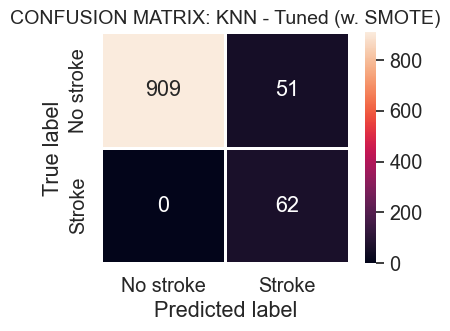

In [2005]:
# Plottting confusion matrix using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
ax = plt.subplot()
sns.heatmap(
    confusion_matrix(
        y_test,
        y_neigh_pred_res
    ),
    annot=True,
    fmt = "d",
    linewidths=2
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CONFUSION MATRIX: KNN - Tuned (w. SMOTE)",fontsize=14)
ax.xaxis.set_ticklabels(['No stroke', 'Stroke']); 
ax.yaxis.set_ticklabels(['No stroke', 'Stroke'])
plt.show()

### 4. Random Forest Regressor

*Source:* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random+forest+regressor
- Exercise 8


#### Initial model

**Without SMOTE**

In [2006]:
# Initializing train-test split for this model
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Building initial Random Forest Classifier Model 
rf_clf = RandomForestClassifier()

# Fitting the model to the training set
rf_clf = rf_clf.fit(X_train, y_train)

# Predicting target values (y) for new data in testing set
y_rf_clf_pred = rf_clf.predict(X_test)

# -- Classification report -- 
# K-Fold Cross-Validation
accuracies = cross_val_score(estimator = rf_clf, X = X_train, y = y_train, cv = 10)   

# Printing scores on training and testing 
print("---------- WITHOUT SMOTE ----------")
print("Accuracy-score on training data: {:.3f}".format(rf_clf.score(X_train, y_train)))
print("Accuracy-score on testing data: {:.3f}".format(rf_clf.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores



---------- WITHOUT SMOTE ----------
Accuracy-score on training data: 1.000
Accuracy-score on testing data: 0.939
K-Fold Validation Mean Accuracy: 95.23 %
0.95 accuracy with a standard deviation of 0.00


In [2007]:
# Print classification report
print(classification_report(y_test,y_rf_clf_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9393    1.0000    0.9687       960
           1     0.0000    0.0000    0.0000        62

    accuracy                         0.9393      1022
   macro avg     0.4697    0.5000    0.4844      1022
weighted avg     0.8823    0.9393    0.9100      1022



**With SMOTE**

In [2008]:
# Initializing train-test split for this model
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Building initial Classification Tree Model 
rf_clf_res = RandomForestClassifier()

# Fitting the model to the training set
rf_clf_res = rf_clf_res.fit(X_train_res, y_train_res)

# Predicting target values (y) for new data in testing set
y_rf_clf_pred_res = rf_clf_res.predict(X_test)

# -- Classification report -- 
# K-Fold Cross-Validation
accuracies_res = cross_val_score(estimator = rf_clf_res, X = X_train_res, y = y_train_res, cv = 10)   

# Printing scores on training and testing set
print("---------- WITH SMOTE ----------")
print("Accuracy on training data {:.3f}".format(rf_clf_res.score(X_train_res, y_train_res)))
print("Accuracy  on testing data: {:.3f}".format(rf_clf_res.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies_res.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores


# sources: 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# k-fold cross validation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy#Model-Selection-
# Exercise 5

---------- WITH SMOTE ----------
Accuracy on training data 1.000
Accuracy  on testing data: 0.977
K-Fold Validation Mean Accuracy: 97.22 %
0.97 accuracy with a standard deviation of 0.01


In [2009]:
# Print classification report
print(classification_report(y_test, y_rf_clf_pred_res, digits=4))

              precision    recall  f1-score   support

           0     0.9795    0.9969    0.9881       960
           1     0.9333    0.6774    0.7850        62

    accuracy                         0.9775      1022
   macro avg     0.9564    0.8371    0.8866      1022
weighted avg     0.9767    0.9775    0.9758      1022



#### Optimizing Hyperparameters - RandomizedSearchCV
*Source:*
- https://www.section.io/engineering-education/random-search-hyperparameters/
- https://www.kaggle.com/code/funxexcel/p3-random-forest-tuning-randomizedsearchcv/notebook
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

##### Pipeline parameters

In [2010]:
# Using RandomizedSearchCV to optimize hyperparameters for Random Forest Classifier
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)] # Returns array with 10 random values between 10 and 80


# Creating the parameter grid with parameters to search through
param_grid = {'n_estimators': n_estimators, # Number of trees in random forest
               'max_features': ['sqrt'], # Number of features to consider at every split - 'auto' removed as it is depreciated
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], # Maximum number of levels in tree
               'min_samples_split': [2, 5, 10],# Minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4],# Minimum number of samples required at each leaf node
               'bootstrap': [True, False] }# Method of selecting samples for training each tree


**Without SMOTE**

In [2011]:
# Implementing RandomizedSearchCV for the model
rf_clf_tuned_pipeline  = make_pipeline(StandardScaler(), 
                                    RandomizedSearchCV(RandomForestClassifier(), 
                                                       random_state = 5, param_distributions = param_grid, 
                                                       cv = 5, verbose = True, scoring = 'recall'))

# Fitting model to training set
rf_clf_tuned = rf_clf_tuned_pipeline.fit(X_train,y_train)

# Identifying the optimal hyperparameters
rf_clf_tuned[1].best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 72,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

**With SMOTE**

In [2012]:
# Implementing RandomizedSearchCV for the model
rf_clf_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                       RandomizedSearchCV(RandomForestClassifier(), 
                                                          random_state = 5, param_distributions = param_grid, 
                                                          cv = 5, verbose = True, scoring = 'recall'))

# Fitting model to training set
rf_clf_tuned_res = rf_clf_tuned_pipeline_res.fit(X_train_res,y_train_res)

# Identifying the optimal hyperparameters
rf_clf_tuned_res[1].best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 48,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

##### Tuning models
TODO: tjek model er opdateret med hyperparametre

**Without SMOTE**

In [2013]:
# Tuning model with optimized hyperparameters
rf_clf_tuned = RandomForestClassifier(n_estimators=48, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=90, bootstrap=False)

# Train - Fitting model to training set 
rf_clf_tuned.fit(X_train, y_train)

# Predict y using test set
y_rf_clf_pred = rf_clf_tuned.predict(X_test)


# Reporting test scores
print('Accuracy of Logistic Regression classifier on test set (without RFECV): {:.10f}'.format(rf_clf_tuned.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set (without RFECV): 0.9393346380


In [2014]:
# Printing classification report
print(classification_report(y_test,y_rf_clf_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9393    1.0000    0.9687       960
           1     0.0000    0.0000    0.0000        62

    accuracy                         0.9393      1022
   macro avg     0.4697    0.5000    0.4844      1022
weighted avg     0.8823    0.9393    0.9100      1022



**With SMOTE**

In [2015]:
# Tuning model with optimized hyperparameters
rf_clf_tuned_res = RandomForestClassifier(n_estimators=48, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=90, bootstrap=False)

# Train - Fitting model to training set 
rf_clf_tuned_res.fit(X_train_res, y_train_res)

# Predict y using test set
y_rf_clf_pred_res= rf_clf_tuned_res.predict(X_test)

# Reporting test scores
print('Accuracy of Logistic Regression classifier on test set (without RFECV): {:.10f}'.format(rf_clf_tuned_res.score(X_test, y_test)))


Accuracy of Logistic Regression classifier on test set (without RFECV): 0.9765166341


In [2016]:
# Printing classification report
print(classification_report(y_test,y_rf_clf_pred_res, digits=4))

              precision    recall  f1-score   support

           0     0.9766    0.9990    0.9876       960
           1     0.9750    0.6290    0.7647        62

    accuracy                         0.9765      1022
   macro avg     0.9758    0.8140    0.8762      1022
weighted avg     0.9765    0.9765    0.9741      1022



#### Selecting Important Features

##### Feature Importance

**Without SMOTE**

In [2017]:
# Applying feature_importances_ on the classification tree
rf_clf_imp = list(rf_clf_tuned.feature_importances_)

# Get column names
rf_clf_colname = list(X_train.columns)

# Making a dict for dataframe
rf_clf_dict = {'Feature':rf_clf_colname,'Importance':rf_clf_imp}

# Creating a dataframe with the feature importance values
rf_clf_feature_imp = pd.DataFrame(rf_clf_dict)

# Ranking the features according to feature importance values
rf_clf_feature_rank = rf_clf_feature_imp.sort_values(by='Importance', ascending=False)

# Print ranked
rf_clf_feature_rank = rf_clf_feature_imp.sort_values(by='Importance', ascending=False)

# Print top N features
#rf_clf_feature_rank.head(10)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_


**With SMOTE**

In [2018]:
# Applying feature_importances_ on the classification tree
rf_clf_imp = list(rf_clf_tuned_res.feature_importances_)

# Get column names
rf_clf_colname = list(X_train_res.columns)

# Making a dict for dataframe
rf_clf_dict = {'Feature':rf_clf_colname,'Importance':rf_clf_imp}

# Creating a dataframe with the feature importance values
rf_clf_feature_imp = pd.DataFrame(rf_clf_dict)

# Ranking the features according to feature importance values
rf_clf_feature_rank_res = rf_clf_feature_imp.sort_values(by='Importance', ascending=False)

# Print ranked
rf_clf_feature_rank_res = rf_clf_feature_imp.sort_values(by='Importance', ascending=False)

# Print top N features
# rf_clf_feature_rank_res.head(10)


# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_


##### RFECV
Dette afsnit er kun for test af hvordan man kan bruge RFECV til at finde important features. 
Brugt fra:
-  https://practicaldatascience.co.uk/machine-learning/how-to-use-recursive-feature-elimination-in-your-models
- Simones

###### Identifying important features - RFECV

**Without SMOTE**

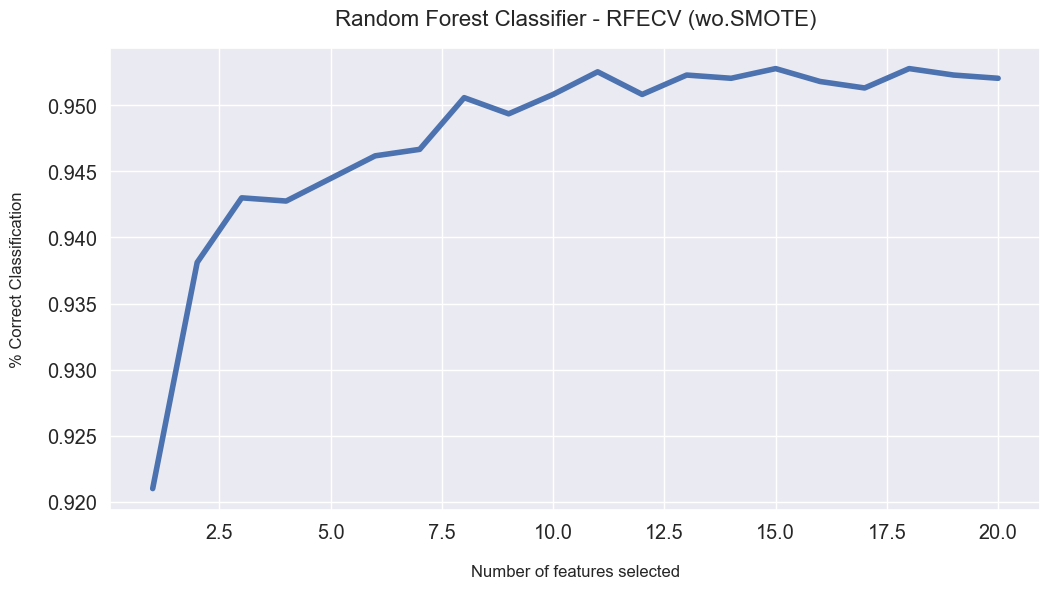

In [2019]:
# Using RFECV with Random Forest Classifier to identify the imortant features in regards to accuracy

# Defining the selector
rf_clf_rfecv = RFECV(estimator=rf_clf_tuned, 
              step=1, 
              cv=StratifiedKFold(6), # Cross-validation for evaluation model
              scoring='accuracy')

# Fitting selector to training set
rf_clf_rfecv.fit(X_train, y_train)

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.title('Random Forest Classifier - RFECV (wo.SMOTE)', fontsize=16, pad=16)
plt.xlabel('Number of features selected', fontsize=12, labelpad=16)
plt.ylabel('% Correct Classification', fontsize=12, labelpad=16)
plt.plot(range(1, len(rf_clf_rfecv.cv_results_['mean_test_score']) + 1), rf_clf_rfecv.cv_results_['mean_test_score'], linewidth=4)
plt.show()

# https://practicaldatascience.co.uk/machine-learning/how-to-use-recursive-feature-elimination-in-your-models

In [2020]:
#Print results
print('Optimal feature amount:',rf_clf_rfecv.n_features_)

# Here we look into our orignal columns to see which are listen in our Recursive model of features
print('Selected features:', list(X_train.columns[rf_clf_rfecv.support_]))

Optimal feature amount: 18
Selected features: ['Age', 'Ever_married', 'BMI', 'Hypertension', 'Heart_disease', 'Avg_glucose_level', 'Gender_Female', 'Gender_Male', 'Work_type_Children', 'Work_type_Government_job', 'Work_type_Private_job', 'Work_type_Self_employed', 'Residence_type_Rural', 'Residence_type_Urban', 'Smoking_status_Formerly_smoked', 'Smoking_status_Never_smoked', 'Smoking_status_Smokes', 'Smoking_status_Unknown']


**With SMOTE**

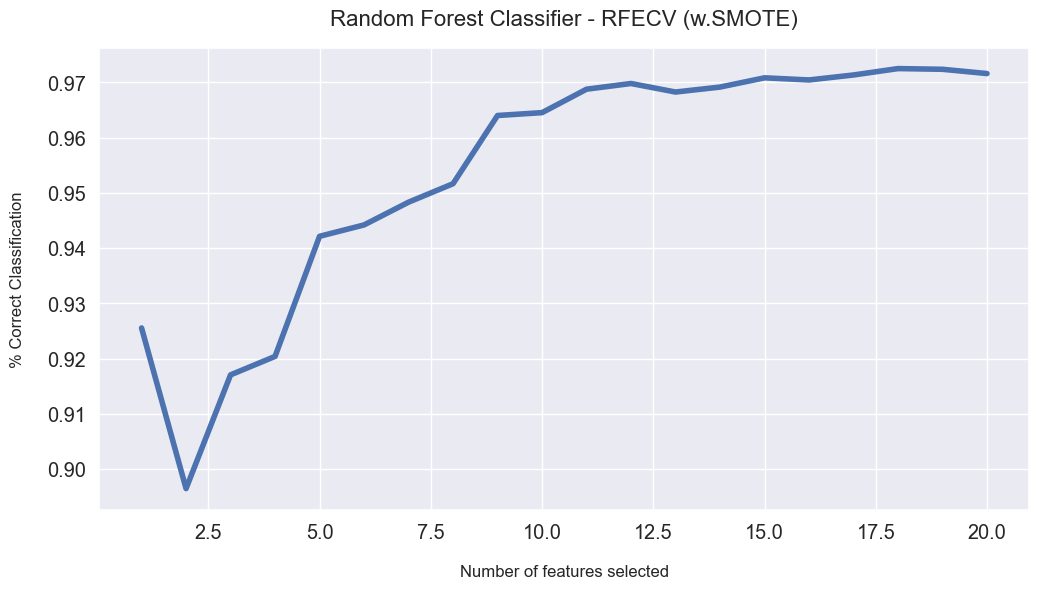

In [2021]:
# Using RFECV with Random Forest Classifier to identify the imortant features in regards to accuracy

# Defining the selector
rf_clf_rfecv_res = RFECV(estimator=rf_clf_tuned_res, 
              step=1, 
              cv=StratifiedKFold(6), # Cross-validation for evaluation model
              scoring='accuracy')

# Fitting selector to training set
rf_clf_rfecv_res.fit(X_train_res, y_train_res)

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.title('Random Forest Classifier - RFECV (w.SMOTE)', fontsize=16, pad=16)
plt.xlabel('Number of features selected', fontsize=12, labelpad=16)
plt.ylabel('% Correct Classification', fontsize=12, labelpad=16)
plt.plot(range(1, len(rf_clf_rfecv_res.cv_results_['mean_test_score']) + 1), rf_clf_rfecv_res.cv_results_['mean_test_score'], linewidth=4)
plt.show()

# https://practicaldatascience.co.uk/machine-learning/how-to-use-recursive-feature-elimination-in-your-models

In [2022]:
#Print results
print('Optimal feature amount:',rf_clf_rfecv_res.n_features_)

# Here we look into our orignal columns to see which are listen in our Recursive model of features
print('Selected features:', list(X_train_res.columns[rf_clf_rfecv_res.support_]))


Optimal feature amount: 18
Selected features: ['Age', 'Ever_married', 'BMI', 'Hypertension', 'Heart_disease', 'Avg_glucose_level', 'Gender_Female', 'Gender_Male', 'Work_type_Children', 'Work_type_Government_job', 'Work_type_Private_job', 'Work_type_Self_employed', 'Residence_type_Rural', 'Residence_type_Urban', 'Smoking_status_Formerly_smoked', 'Smoking_status_Never_smoked', 'Smoking_status_Smokes', 'Smoking_status_Unknown']


###### Feature Importance - RFECV

**Without SMOTE**

In [2023]:
# Extracting feature importance
rf_clf_rfecv_imp = list(rf_clf_rfecv.estimator_.feature_importances_)

# Creating new X
X_copy= X.copy()

# Creating new X with the selected important features
X_imp = X_copy.drop(X_copy.columns[np.where(rf_clf_rfecv.support_ == False)[0]], axis=1, inplace=True)

# Getting column names
rf_clf_colname = list(X_copy.columns)

# Creating dict for dataframe
rfecv_dict = {'Feature':rf_clf_colname,'Importance':rf_clf_rfecv_imp}

# Creating df and ranking the features according to feature importance values
rfecv_feature_imp_rank = pd.DataFrame(rfecv_dict).sort_values(by='Importance',ascending = False)

# Print Feature Importance w. RFECV - ranked
rfecv_feature_imp_rank

# Print top N features
#rfecv_feature_imp_rank.head(10)

,Feature,Importance
5,Avg_glucose_level,0.268443
0,Age,0.263627
2,BMI,0.215535
4,Heart_disease,0.026349
3,Hypertension,0.024990
1,Ever_married,0.022790
16,Smoking_status_Smokes,0.019895
15,Smoking_status_Never_smoked,0.019127
17,Smoking_status_Unknown,0.016595
13,Residence_type_Urban,0.016557


**With SMOTE**

In [2024]:
# Extracting feature importance
rf_clf_rfecv_imp_res = list(rf_clf_rfecv_res.estimator_.feature_importances_)

# Creating new X
X_copy= X_res.copy()

# Creating new X with the selected important features
X_imp = X_copy.drop(X_copy.columns[np.where(rf_clf_rfecv_res.support_ == False)[0]], axis=1, inplace=True)

# Getting column names
rf_clf_colname = list(X_copy.columns)

# Creating dict for dataframe
rfecv_dict = {'Feature':rf_clf_colname,'Importance':rf_clf_rfecv_imp_res}

# Creating df and ranking the features according to feature importance values
rfecv_feature_imp_rank_res = pd.DataFrame(rfecv_dict).sort_values(by='Importance',ascending = False)

# Print Feature Importance w. RFECV - ranked
rfecv_feature_imp_rank_res

# Print top N features
#rfecv_feature_imp_rank_res.head(10)

,Feature,Importance
0,Age,0.303973
5,Avg_glucose_level,0.097856
17,Smoking_status_Unknown,0.066155
2,BMI,0.061424
15,Smoking_status_Never_smoked,0.053408
13,Residence_type_Urban,0.051187
12,Residence_type_Rural,0.045978
7,Gender_Male,0.045148
6,Gender_Female,0.044704
14,Smoking_status_Formerly_smoked,0.040128


#### Tuning model

**Without SMOTE**

In [2025]:
# Using the tuned model to predict y using test set
y_rf_clf_pred = rf_clf_rfecv.predict(X_test)

**With SMOTE**

In [2026]:
# Using the tuned model to predict y using test set
y_rf_clf_pred_res = rf_clf_rfecv_res.predict(X_test)

#### Reporting Scores

**Without SMOTE**

In [2027]:
# Calculating K-Fold Cross-Validation score
accuracies = cross_val_score(estimator = rf_clf_rfecv, X = X_train, y = y_train, cv = 10)   

# Printing scores on training and testing set
print("---------- Without SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(rf_clf_rfecv.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}\n".format(rf_clf_rfecv.score(X_test, y_test)))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores


---------- Without SMOTE ----------
Accuracy on training set: 1.000
Accuracy on testing set: 0.937

0.95 accuracy with a standard deviation of 0.00


In [2028]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_rf_clf_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9392    0.9979    0.9677       960
           1     0.0000    0.0000    0.0000        62

    accuracy                         0.9374      1022
   macro avg     0.4696    0.4990    0.4838      1022
weighted avg     0.8822    0.9374    0.9090      1022



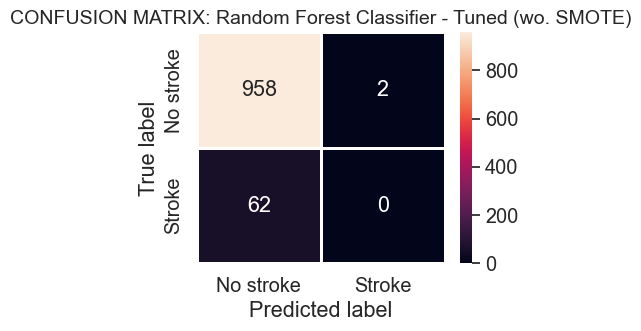

In [2029]:
# Plottting confusion matrix using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
ax = plt.subplot()
sns.heatmap(
    confusion_matrix(
        y_test,
        y_rf_clf_pred
    ),
    annot=True,
    fmt = "d",
    linewidths=2
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CONFUSION MATRIX: Random Forest Classifier - Tuned (wo. SMOTE)",fontsize=14)
ax.xaxis.set_ticklabels(['No stroke', 'Stroke']); 
ax.yaxis.set_ticklabels(['No stroke', 'Stroke'])
plt.show()

**With SMOTE**

In [2030]:
# Calculating K-Fold Cross-Validation score
accuracies_res = cross_val_score(estimator = rf_clf_rfecv_res, X = X_train_res, y = y_train_res, cv = 10)   

# Printing scores on training and testing set for both models
print("---------- With SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(rf_clf_rfecv_res.score(X_train_res, y_train_res)))
print("Accuracy on testing set {:.3f}\n".format(rf_clf_rfecv_res.score(X_test, y_test)))

---------- With SMOTE ----------
Accuracy on training set: 1.000
Accuracy on testing set 0.980



In [2031]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_rf_clf_pred_res, digits=4))

              precision    recall  f1-score   support

           0     0.9806    0.9990    0.9897       960
           1     0.9773    0.6935    0.8113        62

    accuracy                         0.9804      1022
   macro avg     0.9789    0.8463    0.9005      1022
weighted avg     0.9804    0.9804    0.9789      1022



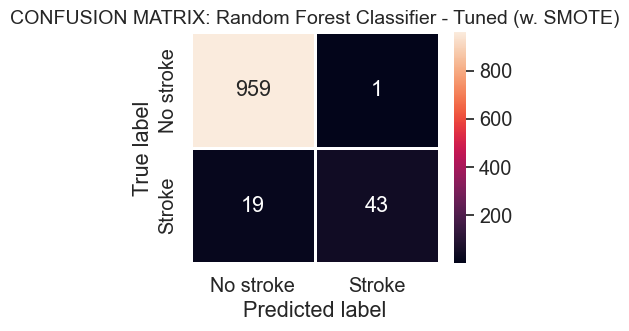

In [2032]:
# Plottting confusion matrix using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
ax = plt.subplot()
sns.heatmap(
    confusion_matrix(
        y_test,
        y_rf_clf_pred_res
    ),
    annot=True,
    fmt = "d",
    linewidths=2
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CONFUSION MATRIX: Random Forest Classifier - Tuned (w. SMOTE)",fontsize=14)
ax.xaxis.set_ticklabels(['No stroke', 'Stroke']); 
ax.yaxis.set_ticklabels(['No stroke', 'Stroke'])
plt.show()

# 5. Evaluation

To evaluate each of out candicate classifier models, we use classification_report function to get scores on performance of the models.

*Source:*
- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


## Classification Reports

### Baseline model

**Without SMOTE**

In [2033]:
# Printing the classification report for our Baseline Model (Dummy Classifier)
print(classification_report(y_test, y_dummy_clf_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



**With SMOTE**

In [2034]:
# Printing the classification report for our Baseline Model (Dummy Classifier)
print(classification_report(y_test, y_dummy_clf_pred_res))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       960
           1       0.06      1.00      0.11        62

    accuracy                           0.06      1022
   macro avg       0.03      0.50      0.06      1022
weighted avg       0.00      0.06      0.01      1022



### Classification Tree

**Without SMOTE**

In [2035]:
# Printing the classification report for our Classification Tree Model (wo. SMOTE)
print(classification_report(y_test, y_dtree_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



**With SMOTE**

In [2036]:
# Printing the classification report for our Classification Tree Model (w. SMOTE)
print(classification_report(y_test, y_dtree_pred_res))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       960
           1       0.19      0.65      0.30        62

    accuracy                           0.82      1022
   macro avg       0.58      0.74      0.60      1022
weighted avg       0.93      0.82      0.86      1022



### Logistic Regression

**Without SMOTE**

In [2037]:
# Printing the classification report for our Logistic Regression Model (wo. SMOTE)
print(classification_report(y_test, y_logr_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



**With SMOTE**

In [2038]:
# Printing the classification report for our Logistic Regression Model (w.SMOTE)
print(classification_report(y_test, y_logr_pred_res))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



### KNN Classifier

**Without SMOTE**

In [2039]:
# Printing the classification report for our KNN Classifier Model (wo. SMOTE)
print(classification_report(y_test, y_neigh_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.17      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.89      0.94      0.91      1022



**With SMOTE**

In [2040]:
# Printing the classification report for our KNN Classifier Model (w. SMOTE)
print(classification_report(y_test, y_neigh_pred_res))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       960
           1       0.55      1.00      0.71        62

    accuracy                           0.95      1022
   macro avg       0.77      0.97      0.84      1022
weighted avg       0.97      0.95      0.96      1022



### Random Forest Classifier

In [2041]:
# Printing the classification report for our Random Forest Classifier Model (w. and wo. SMOTE)

# --- Without SMOTE --- 
print(classification_report(y_test, y_rf_clf_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [2042]:
# --- With SMOTE --- 
print(classification_report(y_test, y_rf_clf_pred_res))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       960
           1       0.98      0.69      0.81        62

    accuracy                           0.98      1022
   macro avg       0.98      0.85      0.90      1022
weighted avg       0.98      0.98      0.98      1022



## Reports on all models

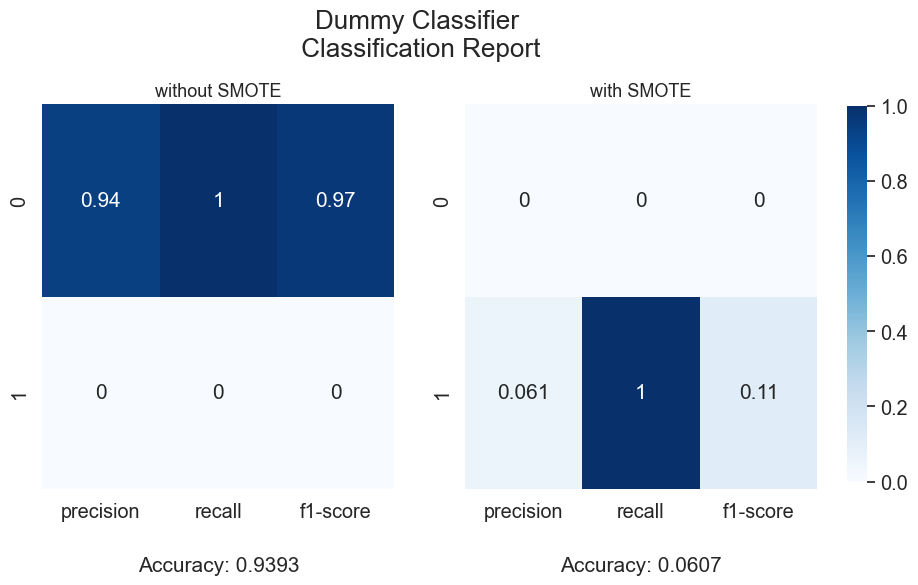

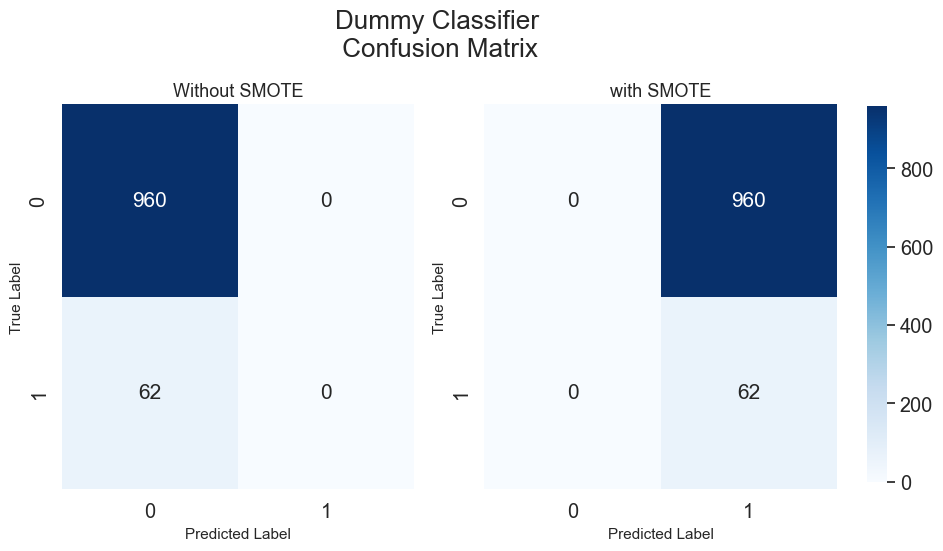

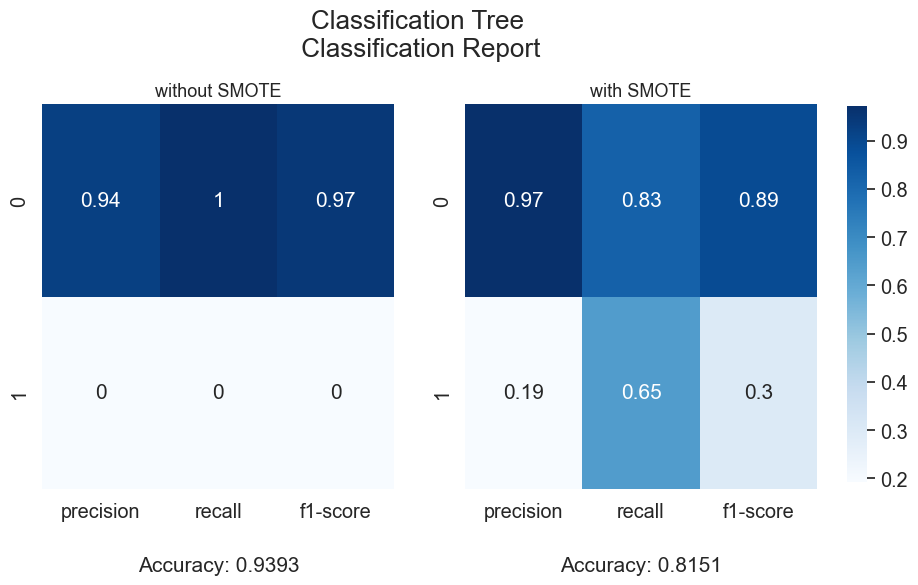

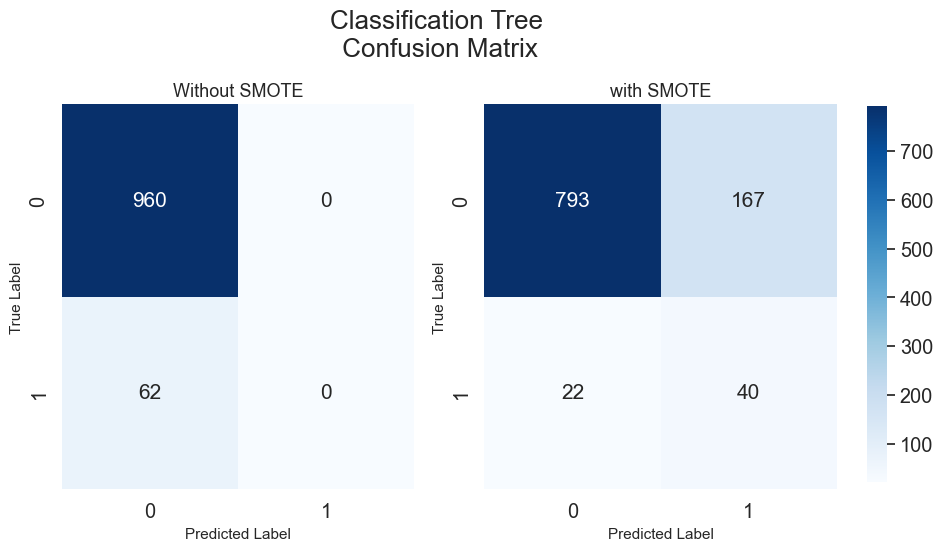

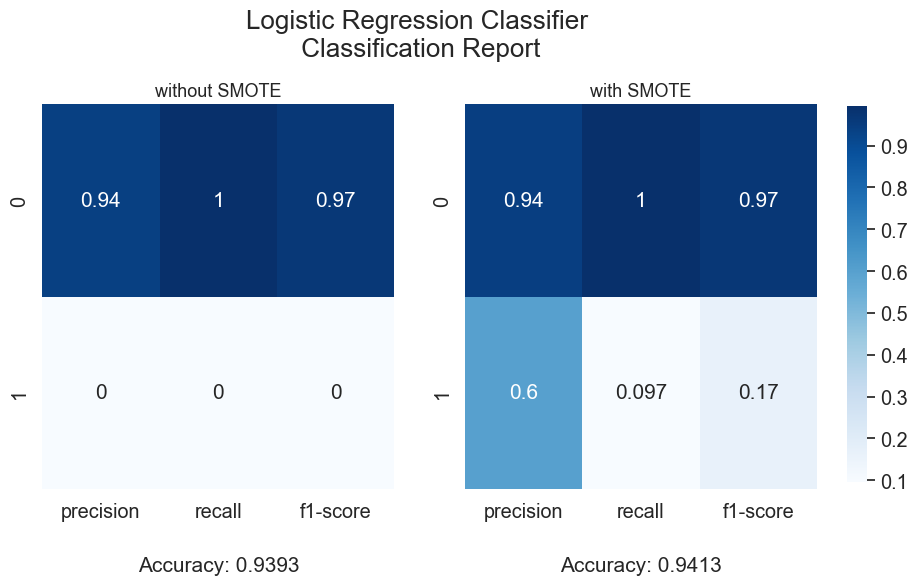

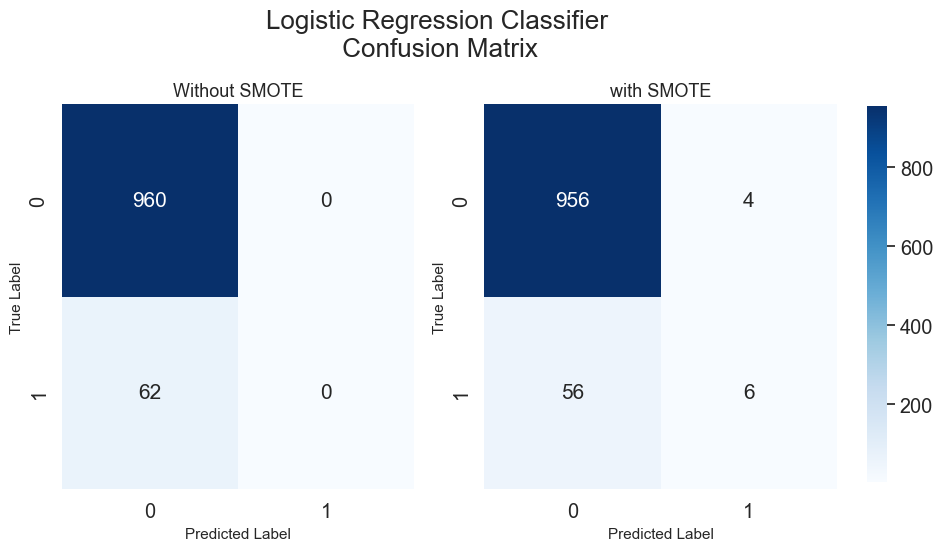

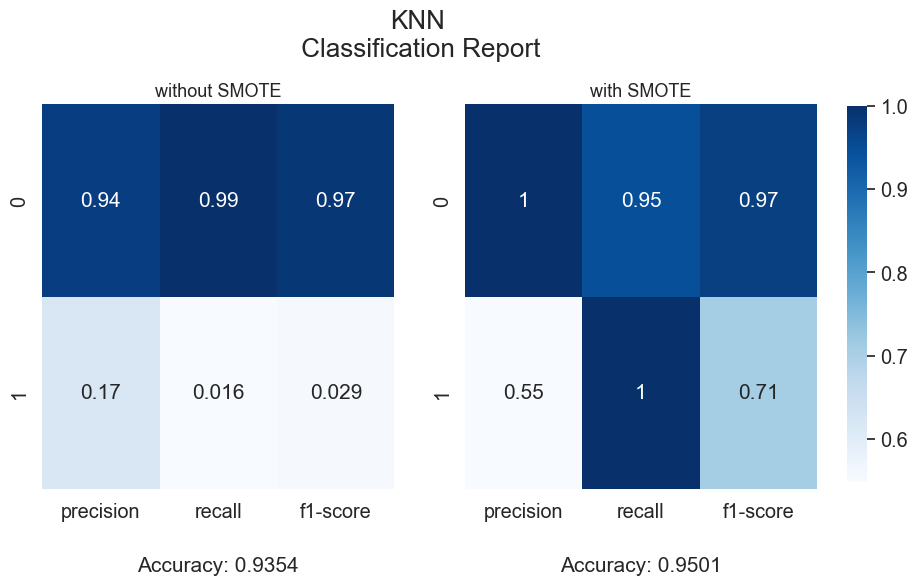

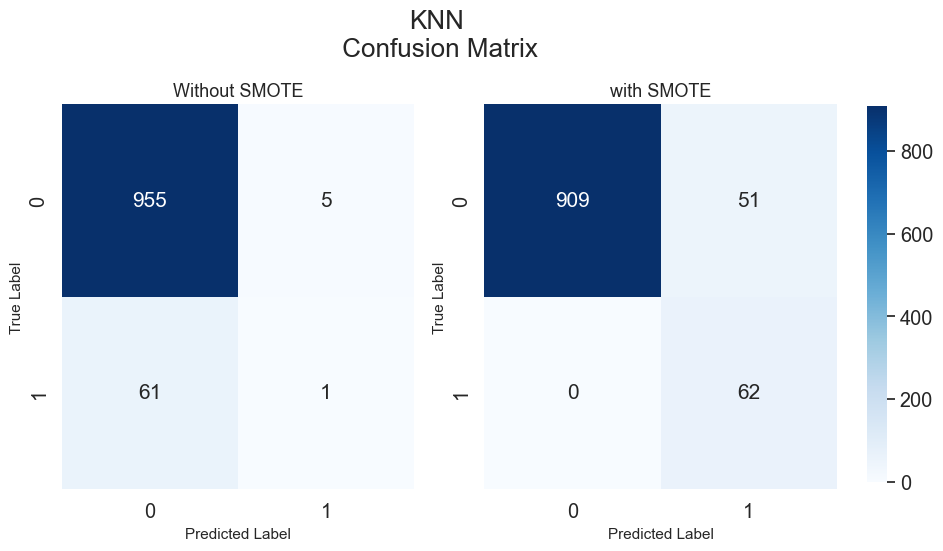

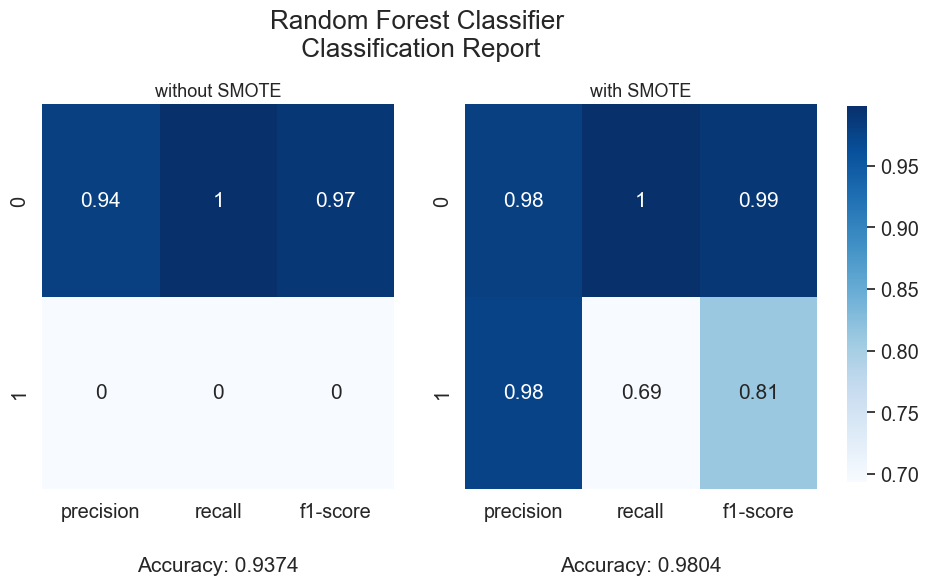

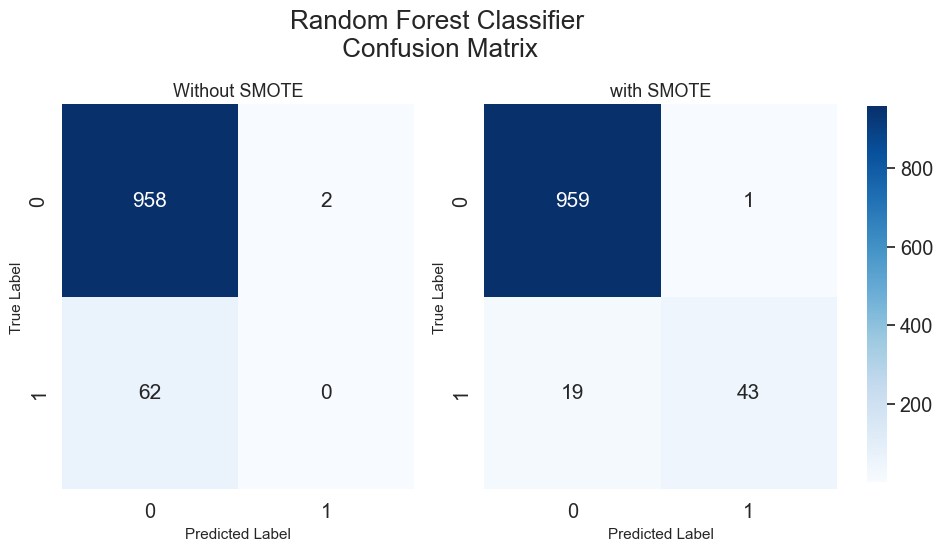

In [2064]:
# Creating dynamic functions to visualize scoring-metrics and confusion matrix for all models
labels = np.arange(10)
target_names = list("01")

# Creating a function that plots a classification report showing (recall, precision, f1, and accuracy)
def plot_classification_report(y_test, y_pred, y_pred_res, title): # Takes in predictions from each model trained both with and without SMOTE
    dtree_report = classification_report(y_test, y_pred, labels=labels, target_names=target_names, output_dict=True)
    dtree_report_res = classification_report(y_test, y_pred_res, labels=labels, target_names=target_names, output_dict=True)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    accuracy_res = round(accuracy_score(y_test, y_pred_res), 4)

    fig = plt.figure(figsize=(10,5)) # Declearing figure for the classification reports
    sns.set(font_scale=1.3)
    fig.suptitle(title + "\n Classification Report", y=1.07)
    cbar_ax = fig.add_axes([.93, 0.125, .02, 0.752]) # Assigning color, bar size, and location

    plt.subplot(1,2,1) # Subplotting model trained without SMOTE
    sns.heatmap(pd.DataFrame(dtree_report).iloc[:-1, :2].T, annot=True, cmap="Blues", cbar=None,annot_kws={"fontsize":15}) # Including accuracy, recall, and f1-score
    plt.title("without SMOTE", fontsize=13)
    plt.xlabel(("Accuracy: " + str(accuracy)), fontsize=15, labelpad=25)

    plt.subplot(1,2,2) # Subplot for model trained with SMOTE
    sns.heatmap(pd.DataFrame(dtree_report_res).iloc[:-1, :2].T, annot=True, cmap="Blues", annot_kws={"fontsize":15}, cbar_ax=cbar_ax) # Including accuracy, recall, and f1-score
    plt.title("with SMOTE", fontsize=13)
    plt.xlabel(("Accuracy: " + str(accuracy_res)), fontsize=15, labelpad=25)
    plt.savefig(title +  "_classification_report", bbox_inches='tight') # Saves plot as a png file
    plt.show()

# Creating function that plots confusion matrix
def plot_confusion_matrix(y_test, y_pred, y_pred_res, title): # Takes in predictions from each model trained both with and without SMOTE
    cf_matrix = confusion_matrix(y_test, y_pred)
    cf_matrix_res = confusion_matrix(y_test, y_pred_res)

    fig = plt.figure(figsize=(10,5)) # Declearing figure for the confusion matrices
    sns.set(font_scale=1.3)
    fig.suptitle(title + "\n Confusion Matrix", y=1.07)
    cbar_ax = fig.add_axes([.93, 0.125, .02, 0.752]) # Assigning color bar size and location

    plt.subplot(1,2,1)
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="d", cbar=None, annot_kws={"fontsize":15})
    plt.title("Without SMOTE", fontsize=13)
    plt.ylabel("True Label", fontsize=11)
    plt.xlabel("Predicted Label", fontsize=11)

    plt.subplot(1,2,2)
    sns.heatmap(cf_matrix_res, annot=True, cmap="Blues", fmt="d", annot_kws={"fontsize":15}, cbar_ax=cbar_ax)
    plt.title("with SMOTE", fontsize=13)
    plt.ylabel("True Label", fontsize=11)
    plt.xlabel("Predicted Label", fontsize=11)
    plt.savefig(title + "_confusion_matrix", bbox_inches='tight') # Saves plot as a png file
    plt.show()
    
    # Plotting classification reports and confusion matrix

plot_classification_report(y_test, y_dummy_clf_pred, y_dummy_clf_pred_res, "Dummy Classifier")
plot_confusion_matrix(y_test, y_dummy_clf_pred, y_dummy_clf_pred_res, "Dummy Classifier")
    
plot_classification_report(y_test, y_dtree_pred, y_dtree_pred_res, "Classification Tree")
plot_confusion_matrix(y_test, y_dtree_pred, y_dtree_pred_res, "Classification Tree")

plot_classification_report(y_test, y_logr_pred, y_logr_pred_res, "Logistic Regression Classifier")
plot_confusion_matrix(y_test, y_logr_pred, y_logr_pred_res, "Logistic Regression Classifier")

plot_classification_report(y_test, y_neigh_pred, y_neigh_pred_res, "KNN")
plot_confusion_matrix(y_test, y_neigh_pred, y_neigh_pred_res, "KNN")

plot_classification_report(y_test, y_rf_clf_pred, y_rf_clf_pred_res, "Random Forest Classifier")
plot_confusion_matrix(y_test, y_rf_clf_pred, y_rf_clf_pred_res, "Random Forest Classifier")

# References

Se på følgende:

**Randomness vs. control**
https://towardsdatascience.com/harnessing-randomness-in-machine-learning-59e26e82fdfc

**Baseline models**
https://towardsai.net/p/l/what-are-baseline-models-and-benchmarking-for-machine-learning-why-we-need-them?amp=1

**Feature importance / feature selection**
- Session 5: Lasso
- Mutual information
- Gini imuprity
- wrapper feature selection method. rfe
- https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

- Feature selection > Lige indnen træning af data 
https://www.datacamp.com/tutorial/feature-selection-python


- Rækkefølge af data prepro
https://stats.stackexchange.com/questions/440372/feature-selection-before-or-after-encoding

- SMOTE efter feature selection https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648438/

Cross validation:
- Useful for cases where you have small datasets and you need to utilize every little bit of information to develop your model.